# P5: Découverte des datasets, features engineering et exploration

In [2]:
import fcts_p5 as fct
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import missingno as msno
from haversine import haversine

In [3]:
customers=pd.read_csv('olist_customers_dataset.csv')
geoloc=pd.read_csv('olist_geolocation_dataset.csv')
order_item=pd.read_csv('olist_order_items_dataset.csv')
order_payment=pd.read_csv('olist_order_payments_dataset.csv')
reviews=pd.read_csv('olist_order_reviews_dataset.csv')
orders=pd.read_csv('olist_orders_dataset.csv')
products=pd.read_csv('olist_products_dataset.csv')
sellers=pd.read_csv('olist_sellers_dataset.csv')
prod_cat=pd.read_csv('product_category_name_translation.csv')

In [4]:
products.product_category_name.nunique()

73

In [146]:
lst_df=[customers,geoloc,order_item,order_payment,reviews,orders,products,sellers,prod_cat]
lst_df_name=['olist_customers_dataset.csv','olist_geolocation_dataset.csv','olist_order_items_dataset.csv',
             'olist_order_payments_dataset.csv','olist_order_reviews_dataset.csv','olist_orders_dataset.csv',
             'olist_products_dataset.csv','olist_sellers_dataset.csv','product_category_name_translation.csv']

In [147]:
len(lst_df_name)

9

In [5]:
for k in range(len(lst_df)):
    fct.desc_df(lst_df[k],name=lst_df_name[k])

Dans la base de données olist_customers_dataset.csv on a 99441 lignes avec 5 variables. Elle est remplie à 100.0 % et il y a 0 lignes dupliquées
Dans la base de données olist_geolocation_dataset.csv on a 1000163 lignes avec 5 variables. Elle est remplie à 100.0 % et il y a 261831 lignes dupliquées
Dans la base de données olist_order_items_dataset.csv on a 112650 lignes avec 7 variables. Elle est remplie à 100.0 % et il y a 0 lignes dupliquées
Dans la base de données olist_order_payments_dataset.csv on a 103886 lignes avec 5 variables. Elle est remplie à 100.0 % et il y a 0 lignes dupliquées
Dans la base de données olist_order_reviews_dataset.csv on a 99224 lignes avec 7 variables. Elle est remplie à 78.99 % et il y a 0 lignes dupliquées
Dans la base de données olist_orders_dataset.csv on a 99441 lignes avec 8 variables. Elle est remplie à 99.38 % et il y a 0 lignes dupliquées
Dans la base de données olist_products_dataset.csv on a 32951 lignes avec 9 variables. Elle est remplie à 99.17

On voit qu'on a des valeurs manquantes pour certains dataset. Et des individus dupliqués également. 
customers: 

In [6]:
geoloc.drop_duplicates().sort_values(by='geolocation_zip_code_prefix')

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
519                             1001       -23.551337       -46.634027   
235                             1001       -23.550642       -46.634410   
206                             1001       -23.550498       -46.634338   
326                             1001       -23.551427       -46.634074   
1182                            1001       -23.549779       -46.633957   
...                              ...              ...              ...   
999796                         99980       -28.388342       -51.845194   
999775                         99980       -28.386689       -51.847091   
1000161                        99980       -28.388932       -51.846871   
999864                         99990       -28.329472       -51.769109   
999758                         99990       -28.329718       -51.769615   

        geolocation_city geolocation_state  
519            sao paulo                SP  
235            sao paulo                SP  
206            sao paulo                SP  
326            sao paulo                SP  
1182           sao paulo                SP  
...                  ...               ...  
999796   david canabarro                RS  
999775   david canabarro                RS  
1000161  david canabarro                RS  
999864         muliterno                RS  
999758         muliterno                RS  

[738332 rows x 5 columns]

In [7]:
customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [8]:
fct.pie_types_variable(customers)

orders: 

In [9]:
fct.pie_remplissage(orders)

<Figure size 432x288 with 0 Axes>

In [10]:
msno.bar(orders)

<AxesSubplot:>

<AxesSubplot:>

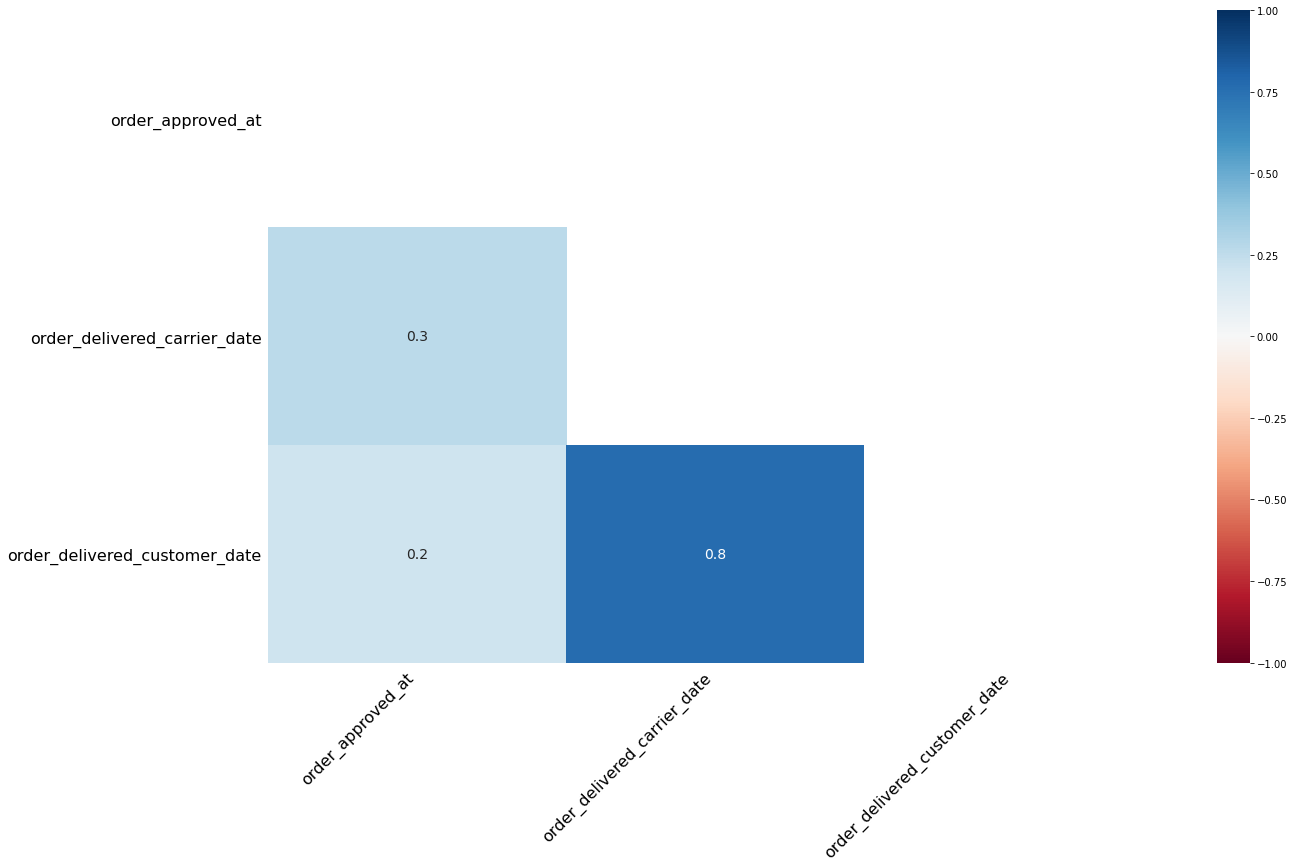

In [11]:
msno.heatmap(orders)

On peut voir que quand il manque des dates, il en manque plusieurs donc on peut supprimer les individus sans perdre beaucoup d'information:

In [12]:
len(set(orders.order_id.unique())-set(set(orders.order_id.unique())-set(reviews.order_id.unique()))),len(set(reviews.order_id.unique())-set(set(reviews.order_id.unique())-set(orders.order_id.unique())))

(98673, 98673)

In [13]:
orders.shape

(99441, 8)

On supprime les individus do,nt il manque des données sur les dates. On peut se douter que ces données manquantes sont liées au status de la commande (délivrée, annulée, etc...)

In [14]:
orders.dropna(inplace=True)

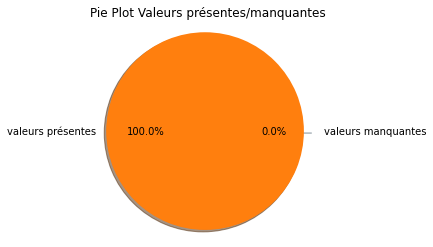

<Figure size 432x288 with 0 Axes>

In [15]:
fct.pie_remplissage(orders)

In [16]:
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [17]:
orders.order_status.value_counts()

delivered    96455
canceled         6
Name: order_status, dtype: int64

Etant données le peu de valeur annulé on va pas pouvoir faire un clustering représentatif donc je prends la décision de garder seulement les commandes étant correctement livrées

In [18]:
orders=orders[orders.order_status.isin(['delivered'])]

In [19]:
orders.drop('order_status',axis=1,inplace=True)

C:\Users\miche\AppData\Local\Temp\ipykernel_7944\1322655271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders.drop('order_status',axis=1,inplace=True)


In [20]:
fct.pie_types_variable(orders)

transformons les chaines de caractères en date: 

In [21]:
for k in orders.iloc[:,2:].columns:
    orders[k]=orders[k].apply(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))


C:\Users\miche\AppData\Local\Temp\ipykernel_7944\1642782778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders[k]=orders[k].apply(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))


In [22]:
fct.pie_types_variable(orders)

Text(0, 0.5, 'Nombre de commande cummulé')

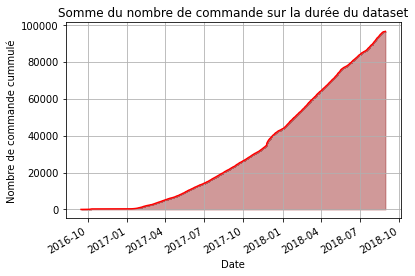

In [23]:
import matplotlib
df_=pd.DataFrame(orders[['order_id','order_purchase_timestamp']])
df_.set_index('order_id',inplace=True)
df_.sort_values(by='order_purchase_timestamp',inplace=True)
df_['cumsum']=pd.DataFrame(df_.count().cumsum())
df_['cumsum']=pd.DataFrame(orders[['order_id']]).count(axis=1).cumsum().values

x_values = df_.order_purchase_timestamp.values
y_values = df_['cumsum'].values

plt.plot(x_values,y_values,color='red')
plt.gcf().autofmt_xdate()
plt.grid()
plt.title('Somme du nombre de commande sur la durée du dataset')
plt.fill_between(x_values, y_values, step="pre",color='darkred', alpha=0.4)
plt.xlabel('Date')
plt.ylabel('Nombre de commande cummulé')


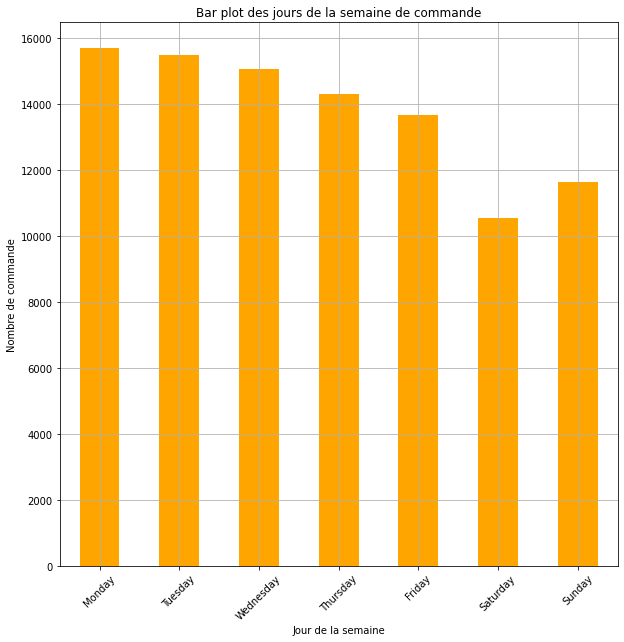

In [24]:
dday = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10,10))

orders.order_purchase_timestamp.apply(lambda x:x.strftime('%A')).value_counts()[dday].plot(kind='bar',color='orange')
plt.title('Bar plot des jours de la semaine de commande')
plt.ylabel('Nombre de commande') 
plt.xlabel('Jour de la semaine')
plt.xticks(rotation=45)
plt.grid()

In [25]:

df_bymont=pd.DataFrame(orders.order_purchase_timestamp.apply(lambda x: x.month))
df_bymont['year']=orders.order_purchase_timestamp.apply(lambda x: x.year)
plt.figure(figsize=(10,10))
df_bymont.groupby('year')['order_purchase_timestamp'].value_counts().unstack(0).plot(kind='bar'
                                                                                     ,figsize=(14,7)
                                                                                    ,width=0.8)
plt.title('Bar plot du nombre de commande par mois et par années')
plt.ylabel('Nombre de commande') 
plt.xlabel('Mois')
plt.xticks(rotation=0)
plt.grid()

<Figure size 720x720 with 0 Axes>

In [26]:

df_bymont=pd.DataFrame(orders.order_purchase_timestamp.apply(lambda x: x.day))
df_bymont['year']=orders.order_purchase_timestamp.apply(lambda x: x.year)
plt.figure(figsize=(10,10))
df_bymont.groupby('year')['order_purchase_timestamp'].value_counts().unstack(0).plot(kind='bar'
                                                                                     ,figsize=(14,7)
                                                                                    ,width=0.8)
plt.title('Bar plot du nombre de commande par jour et par années')
plt.ylabel('Nombre de commande') 
plt.xlabel('Jour')
plt.xticks(rotation=0)
plt.grid()

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

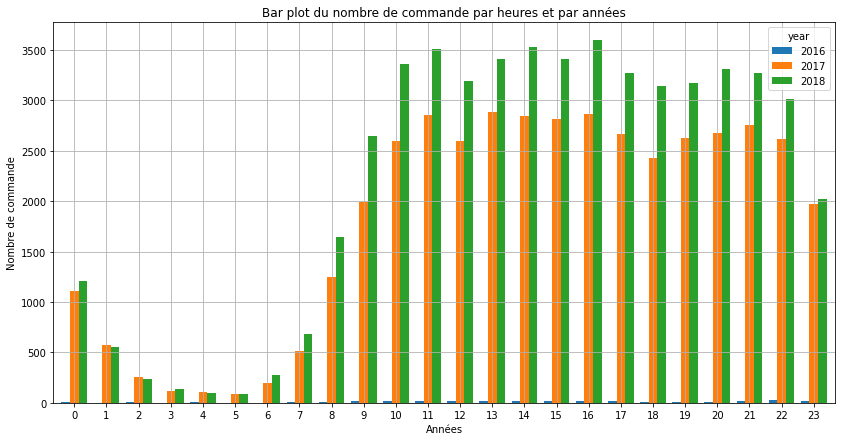

In [27]:

df_bymont=pd.DataFrame(orders.order_purchase_timestamp.apply(lambda x: x.hour))
df_bymont['year']=orders.order_purchase_timestamp.apply(lambda x: x.year)
plt.figure(figsize=(10,10))
df_bymont.groupby('year')['order_purchase_timestamp'].value_counts().unstack(0).plot(kind='bar'
                                                                                     ,figsize=(14,7)
                                                                                    ,width=0.8)
plt.title('Bar plot du nombre de commande par heures et par années')
plt.ylabel('Nombre de commande') 
plt.xlabel('Années')
plt.xticks(rotation=0)
plt.grid()

In [28]:
df_bymont=pd.DataFrame(orders.order_purchase_timestamp.apply(lambda x: x.day_name()))

df_bymont['year']=orders.order_purchase_timestamp.apply(lambda x: x.year)
plt.figure(figsize=(10,10))
df_bymont.groupby('year')['order_purchase_timestamp'].value_counts().unstack(0).plot(kind='bar'
                                                                                     ,figsize=(14,7)
                                                                                    ,width=0.8)

plt.title('Bar plot du nombre de commande par heures et par années')
plt.ylabel('Nombre de commande') 
plt.xlabel('Années')
plt.xticks(rotation=0)
plt.grid()

<Figure size 720x720 with 0 Axes>

création d'une variable du temps de livraison en jour

In [29]:
orders['temps_commande_reception']=(orders.order_delivered_customer_date-orders.order_purchase_timestamp).apply(lambda x:x.days)

C:\Users\miche\AppData\Local\Temp\ipykernel_7944\3914840863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['temps_commande_reception']=(orders.order_delivered_customer_date-orders.order_purchase_timestamp).apply(lambda x:x.days)


In [30]:
orders.shape

(96455, 8)

In [31]:
orders.order_id.nunique()

96455

In [32]:
orders.customer_id.nunique()

96455

In [33]:
customers.shape

(99441, 5)

In [34]:
orders

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_purchase_timestamp   order_approved_at  \
0          2017-10-02 10:56:33 2017-10-02 11:07:15   
1          2018-07-24 20:41:37 2018-07-26 03:24:27   
2          2018-08-08 08:38:49 2018-08-08 08:55:23   
3          2017-11-18 19:28:06 2017-11-18 19:45:59   
4          2018-02-13 21:18:39 2018-02-13 22:20:29   
...                        ...                 ...   
99436      2017-03-09 09:54:05 2017-03-09 09:54:05   
99437      2018-02-06 12:58:58 2018-02-06 13:10:37   
99438      2017-08-27 14:46:43 2017-08-27 15:04:16   
99439      2018-01-08 21:28:27 2018-01-08 21:36:21   
99440      2018-03-08 20:57:30 2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
99436          2017-03-10 11:18:03           2017-03-17 15:08:01   
99437          2018-02-07 23:22:42           2018-02-28 17:37:56   
99438          2017-08-28 20:52:26           2017-09-21 11:24:17   
99439          2018-01-12 15:35:03           2018-01-25 23:32:54   
99440          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date  temps_commande_reception  
0                        2017-10-18                         8  
1                        2018-08-13                        13  
2                        2018-09-04                         9  
3                        2017-12-15                        13  
4                        2018-02-26                         2  
...                             ...                       ...  
99436                    2017-03-28                         8  
99437                    2018-03-02                        22  
99438                    2017-09-27                        24  
99439                    2018-02-15                        17  
99440                    2018-04-03                         7  

[96455 rows x 8 columns]

In [35]:
df_join=pd.merge(customers,orders,how='left',on='customer_id')

In [36]:
df_join.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1      2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7      2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2      2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba      2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f      2018-07-29 09:51:30   

    order_approved_at order_delivered_carrier_date  \
0 2017-05-16 15:22:12          2017-05-23 10:47:57   
1 2018-01-12 20:58:32          2018-01-15 17:14:59   
2 2018-05-20 16:19:10          2018-06-11 14:31:00   
3 2018-03-13 17:29:19          2018-03-27 23:22:42   
4 2018-07-29 10:10:09          2018-07-30 15:16:00   

  order_delivered_customer_date order_estimated_delivery_date  \
0           2017-05-25 10:35:35                    2017-06-05   
1           2018-01-29 12:41:19                    2018-02-06   
2           2018-06-14 17:58:51                    2018-06-13   
3           2018-03-28 16:04:25                    2018-04-10   
4           2018-08-09 20:55:48                    2018-08-15   

   temps_commande_reception  
0                       8.0  
1                      16.0  
2                      26.0  
3                      14.0  
4                      11.0

In [37]:
orders.customer_id.nunique()

96455

In [38]:
order_item.order_id.nunique()

98666

In [39]:
order_item.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [40]:
order_item.drop(['order_item_id','shipping_limit_date'],axis=1,inplace=True)

Avant de joindre directement tous les produits de chaque commande, on peut essayé de travailler sur chaque commande puis ensuite sur chaque clients! 
Et pour cela on peut s'interesser à order_item qui permet de lier les produits, leur provenances et finalement 

In [41]:
order_item.nunique()

order_id         98666
product_id       32951
seller_id         3095
price             5968
freight_value     6999
dtype: int64

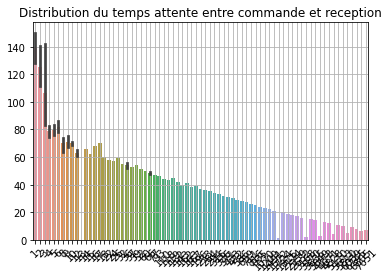

In [42]:
ax=sns.barplot(x=orders.temps_commande_reception.value_counts().sort_index().values,y=orders.temps_commande_reception.value_counts().sort_index().index)
plt.xticks(rotation=45)
plt.title('Distribution du temps attente entre commande et reception')
plt.grid()

In [43]:
products

product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
0                     40.0                       287.0                 1.0   
1                     44.0                       276.0                 1.0   
2                     46.0                       250.0                 1.0   
3                     27.0                       261.0                 1.0   
4                     37.0                       402.0                 4.0   
...                    ...                         ...                 ...   
32946                 45.0                        67.0                 2.0   
32947                 41.0                       971.0                 1.0   
32948                 50.0                       799.0                 1.0   
32949                 60.0                       156.0                 2.0   
32950                 58.0                       309.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
0                 225.0               16.0               10.0   
1                1000.0               30.0               18.0   
2                 154.0               18.0                9.0   
3                 371.0               26.0                4.0   
4                 625.0               20.0               17.0   
...                 ...                ...                ...   
32946           12300.0               40.0               40.0   
32947            1700.0               16.0               19.0   
32948            1400.0               27.0                7.0   
32949             700.0               31.0               13.0   
32950            2083.0               12.0                2.0   

       product_width_cm  
0                  14.0  
1                  20.0  
2                  15.0  
3                  26.0  
4                  13.0  
...                 ...  
32946              40.0  
32947              16.0  
32948              27.0  
32949              20.0  
32950               7.0  

[32951 rows x 9 columns]

In [44]:
prod_with_cat=pd.merge(products,prod_cat,how='left',on='product_category_name')
prod_with_cat.shape,products.shape,prod_cat.shape

((32951, 10), (32951, 9), (71, 2))

In [45]:
prod_with_cat.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             225.0               16.0               10.0              14.0   
1            1000.0               30.0               18.0              20.0   
2             154.0               18.0                9.0              15.0   
3             371.0               26.0                4.0              26.0   
4             625.0               20.0               17.0              13.0   

  product_category_name_english  
0                     perfumery  
1                           art  
2                sports_leisure  
3                          baby  
4                    housewares

In [46]:
prod_with_cat['volume_cm3']=prod_with_cat.product_height_cm*prod_with_cat.product_width_cm*prod_with_cat.product_length_cm

In [47]:
prod_with_cat.shape

(32951, 11)

In [48]:
prod_with_cat.product_category_name_english.value_counts()

bed_bath_table               3029
sports_leisure               2867
furniture_decor              2657
health_beauty                2444
housewares                   2335
                             ... 
tablets_printing_image          9
fashion_childrens_clothes       5
home_comfort_2                  5
security_and_services           2
cds_dvds_musicals               1
Name: product_category_name_english, Length: 71, dtype: int64

Rassemblons les catégories en moins de catégories cat 71 c'est bcp! 

In [49]:
dict_rename={           
            'la_cuisine':'maison',
            'small_appliances_home_oven_and_coffee':'maison',
            'home_comfort_2':'maison',
            'home_appliances_2':'maison',
            'furniture_mattress_and_upholstery':'maison',
            'bed_bath_table':'maison', 
            'kitchen_dining_laundry_garden_furniture':'maison',            
            'furniture_living_room':'maison',
            'furniture_bedroom':'maison',
            'small_appliances':'maison',           
            'home_appliances':'maison',
            'home_confort':'maison',

    
            'security_and_services':'service_outils',
            'arts_and_craftmanship':'service_outils',
            'signaling_and_security':'service_outils',
            'construction_tools_safety':'service_outils',
            'industry_commerce_and_business':'service_outils',
            'home_construction':'service_outils',
            'costruction_tools_tools':'service_outils',
            'garden_tools':'service_outils',
            'air_conditioning':'service_outils',     
            'construction_tools_lights':'service_outils',           
            'construction_tools_construction':'service_outils',           
            'costruction_tools_garden':'service_outils',
               'auto':'service_outils',

    
    
    
    
             'computers_accessories':'multimedia',
             'dvds_blu_ray':'multimedia',
             'audio':'multimedia',
             'musical_instruments':'multimedia',
             'art':'multimedia',
             'consoles_games':'multimedia',
             'books_imported':'multimedia',
             'cds_dvds_musicals':'multimedia',
             'music':'multimedia',
             'computers':'multimedia',
             'books_general_interest':'multimedia',
             'books_technical':'multimedia',
             'office_furniture':'multimedia',           
             'fixed_telephony':'multimedia',
             'tablets_printing_image':'multimedia',
             'stationery':'multimedia',
             'telephony':'multimedia',
             'cine_photo':'multimedia',
    
    
            'watches_gifts':'multimedia',
             'electronics':'multimedia',
             'cine_photo':'multimedia',

             
             'fashion_male_clothing':'vetement',
             'fashio_female_clothing':'vetement',
             'fashion_sport':'vetement',
             'fashion_childrens_clothes':'vetement',
             'fashion_shoes':'vetement',
             'fashion_underwear_beach':'vetement',
            'sports_leisure':'vetement',
            'fashion_bags_accessories':'vetement',
            'furniture_decor':'vetement',
            'luggage_accessories':'vetement',           

             
             
             
             'flowers':'consommable',
             'food':'consommable',
             'agro_industry_and_commerce':'consommable',
             'diapers_and_hygiene':'consommable',
             'health_beauty':'consommable',
             'perfumery':'consommable',
             'party_supplies':'consommable',
             'toys':'consommable',
             'drinks':'consommable',
             'christmas_supplies':'consommable',
                'pet_shop':'consommable',
            'housewares':'consommable',
            'baby':'consommable',
            'food_drink':'consommable',
            'market_place':'consommable',                
            'cool_stuff':'consommable',

            }

In [50]:
prod_with_cat.product_category_name_english.replace(dict_rename,inplace=True)

In [51]:
prod_with_cat.product_category_name_english.value_counts()

consommable       10047
multimedia         7125
vetement           7094
maison             4182
service_outils     3880
Name: product_category_name_english, dtype: int64

In [52]:
prod_with_cat.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'volume_cm3'],
      dtype='object')

In [53]:
prod_with_cat.drop([ 'product_category_name', 
                    'product_name_lenght',
                    'product_description_lenght',
                    'product_photos_qty',
                    'product_length_cm', 
                    'product_height_cm', 
                    'product_width_cm'],
                   axis=1,inplace=True)

In [54]:
prod_with_cat.nunique()

product_id                       32951
product_weight_g                  2204
product_category_name_english        5
volume_cm3                        4525
dtype: int64

In [55]:
prod_with_cat.shape

(32951, 4)

In [56]:
gb_price=pd.DataFrame(order_item.groupby('order_id').price.sum()).reset_index()

In [57]:
gb_price.head(2)

order_id  price
0  00010242fe8c5a6d1ba2dd792cb16214   58.9
1  00018f77f2f0320c557190d7a144bdd3  239.9

In [58]:
gb_price.shape

(98666, 2)

In [59]:
gb_order=order_item.groupby('order_id')[['price','freight_value']].sum()

In [60]:
(gb_order.freight_value/(gb_order.freight_value+gb_order.price)).reset_index().rename({0:'pourcentage_livraison'},axis=1)

order_id  pourcentage_livraison
0      00010242fe8c5a6d1ba2dd792cb16214               0.184098
1      00018f77f2f0320c557190d7a144bdd3               0.076704
2      000229ec398224ef6ca0657da4fc703e               0.082400
3      00024acbcdf0a6daa1e931b038114c75               0.496121
4      00042b26cf59d7ce69dfabb4e55b4fd9               0.083196
...                                 ...                    ...
98661  fffc94f6ce00a00581880bf54a75a037               0.126412
98662  fffcd46ef2263f404302a634eb57f7eb               0.094508
98663  fffce4705a9662cd70adb13d4a31832d               0.145058
98664  fffe18544ffabc95dfada21779c9644f               0.134755
98665  fffe41c64501cc87c801fd61db3f6244               0.229253

[98666 rows x 2 columns]

In [61]:
gb_order=gb_price.merge((gb_order.freight_value/(gb_order.freight_value+gb_order.price)).reset_index().rename({0:'pourcentage_livraison'},axis=1),on='order_id',how='left')

In [62]:
gb_order.head()

order_id   price  pourcentage_livraison
0  00010242fe8c5a6d1ba2dd792cb16214   58.90               0.184098
1  00018f77f2f0320c557190d7a144bdd3  239.90               0.076704
2  000229ec398224ef6ca0657da4fc703e  199.00               0.082400
3  00024acbcdf0a6daa1e931b038114c75   12.99               0.496121
4  00042b26cf59d7ce69dfabb4e55b4fd9  199.90               0.083196

In [63]:
gb_order=gb_order.merge(order_item.groupby('order_id').count().product_id.reset_index(),on='order_id',how='left')

In [64]:
gb_order.rename({'product_id':'nb_article'},inplace=True,axis=1)

In [65]:
gb_order

order_id   price  pourcentage_livraison  \
0      00010242fe8c5a6d1ba2dd792cb16214   58.90               0.184098   
1      00018f77f2f0320c557190d7a144bdd3  239.90               0.076704   
2      000229ec398224ef6ca0657da4fc703e  199.00               0.082400   
3      00024acbcdf0a6daa1e931b038114c75   12.99               0.496121   
4      00042b26cf59d7ce69dfabb4e55b4fd9  199.90               0.083196   
...                                 ...     ...                    ...   
98661  fffc94f6ce00a00581880bf54a75a037  299.99               0.126412   
98662  fffcd46ef2263f404302a634eb57f7eb  350.00               0.094508   
98663  fffce4705a9662cd70adb13d4a31832d   99.90               0.145058   
98664  fffe18544ffabc95dfada21779c9644f   55.99               0.134755   
98665  fffe41c64501cc87c801fd61db3f6244   43.00               0.229253   

       nb_article  
0               1  
1               1  
2               1  
3               1  
4               1  
...           ...  
98661           1  
98662           1  
98663           1  
98664           1  
98665           1  

[98666 rows x 4 columns]

In [66]:
df_order_prod=pd.merge(order_item[['order_id','product_id']],prod_with_cat,on='product_id',how='left')

In [67]:
df_order_prod.drop('product_id',axis=1,inplace=True)

In [68]:
df_order_prod.head()

order_id  product_weight_g  \
0  00010242fe8c5a6d1ba2dd792cb16214             650.0   
1  00018f77f2f0320c557190d7a144bdd3           30000.0   
2  000229ec398224ef6ca0657da4fc703e            3050.0   
3  00024acbcdf0a6daa1e931b038114c75             200.0   
4  00042b26cf59d7ce69dfabb4e55b4fd9            3750.0   

  product_category_name_english  volume_cm3  
0                   consommable      3528.0  
1                   consommable     60000.0  
2                      vetement     14157.0  
3                   consommable      2400.0  
4                service_outils     42000.0

In [69]:
df_order_prod.product_category_name_english.value_counts().sum()

111023

In [70]:
df_order_prod.shape

(112650, 4)

In [71]:
df_order_prod.order_id.nunique()

98666

In [72]:
df_order_prod

order_id  product_weight_g  \
0       00010242fe8c5a6d1ba2dd792cb16214             650.0   
1       00018f77f2f0320c557190d7a144bdd3           30000.0   
2       000229ec398224ef6ca0657da4fc703e            3050.0   
3       00024acbcdf0a6daa1e931b038114c75             200.0   
4       00042b26cf59d7ce69dfabb4e55b4fd9            3750.0   
...                                  ...               ...   
112645  fffc94f6ce00a00581880bf54a75a037           10150.0   
112646  fffcd46ef2263f404302a634eb57f7eb            8950.0   
112647  fffce4705a9662cd70adb13d4a31832d             967.0   
112648  fffe18544ffabc95dfada21779c9644f             100.0   
112649  fffe41c64501cc87c801fd61db3f6244             600.0   

       product_category_name_english  volume_cm3  
0                        consommable      3528.0  
1                        consommable     60000.0  
2                           vetement     14157.0  
3                        consommable      2400.0  
4                     service_outils     42000.0  
...                              ...         ...  
112645                   consommable     53400.0  
112646                    multimedia     44460.0  
112647                      vetement      9576.0  
112648                    multimedia      8000.0  
112649                        maison      1710.0  

[112650 rows x 4 columns]

In [73]:
df_order_prod.isna().sum()

order_id                            0
product_weight_g                   18
product_category_name_english    1627
volume_cm3                         18
dtype: int64

In [74]:
gp_prod=df_order_prod.dropna().groupby('order_id').agg({'product_category_name_english':lambda x:x.value_counts().index[0],
                                       'product_weight_g':'sum',
                                       'volume_cm3':'sum'},inplace=True)
gp_prod = gp_prod.rename(columns={"product_category_name_english": "cat_mode_order",
                            "product_weight_g": "total_weight_order",
                            "volume_cm3": "volume_totat_order_cm3",
                           })

In [75]:
gp_prod.cat_mode_order

order_id
00010242fe8c5a6d1ba2dd792cb16214       consommable
00018f77f2f0320c557190d7a144bdd3       consommable
000229ec398224ef6ca0657da4fc703e          vetement
00024acbcdf0a6daa1e931b038114c75       consommable
00042b26cf59d7ce69dfabb4e55b4fd9    service_outils
                                         ...      
fffc94f6ce00a00581880bf54a75a037       consommable
fffcd46ef2263f404302a634eb57f7eb        multimedia
fffce4705a9662cd70adb13d4a31832d          vetement
fffe18544ffabc95dfada21779c9644f        multimedia
fffe41c64501cc87c801fd61db3f6244            maison
Name: cat_mode_order, Length: 97255, dtype: object

In [76]:
gp_prod.isna().mean()

cat_mode_order            0.0
total_weight_order        0.0
volume_totat_order_cm3    0.0
dtype: float64

In [77]:
gp_prod.cat_mode_order.value_counts()

consommable       31429
multimedia        26235
vetement          17469
maison            12216
service_outils     9906
Name: cat_mode_order, dtype: int64

In [78]:
gp_prod.head()

cat_mode_order  total_weight_order  \
order_id                                                               
00010242fe8c5a6d1ba2dd792cb16214     consommable               650.0   
00018f77f2f0320c557190d7a144bdd3     consommable             30000.0   
000229ec398224ef6ca0657da4fc703e        vetement              3050.0   
00024acbcdf0a6daa1e931b038114c75     consommable               200.0   
00042b26cf59d7ce69dfabb4e55b4fd9  service_outils              3750.0   

                                  volume_totat_order_cm3  
order_id                                                  
00010242fe8c5a6d1ba2dd792cb16214                  3528.0  
00018f77f2f0320c557190d7a144bdd3                 60000.0  
000229ec398224ef6ca0657da4fc703e                 14157.0  
00024acbcdf0a6daa1e931b038114c75                  2400.0  
00042b26cf59d7ce69dfabb4e55b4fd9                 42000.0

In [79]:
df_commande=pd.merge(gp_prod.reset_index(),gb_order,on='order_id',how='inner')

In [80]:
df_commande.head()

order_id  cat_mode_order  total_weight_order  \
0  00010242fe8c5a6d1ba2dd792cb16214     consommable               650.0   
1  00018f77f2f0320c557190d7a144bdd3     consommable             30000.0   
2  000229ec398224ef6ca0657da4fc703e        vetement              3050.0   
3  00024acbcdf0a6daa1e931b038114c75     consommable               200.0   
4  00042b26cf59d7ce69dfabb4e55b4fd9  service_outils              3750.0   

   volume_totat_order_cm3   price  pourcentage_livraison  nb_article  
0                  3528.0   58.90               0.184098           1  
1                 60000.0  239.90               0.076704           1  
2                 14157.0  199.00               0.082400           1  
3                  2400.0   12.99               0.496121           1  
4                 42000.0  199.90               0.083196           1

In [81]:
orders.order_id.nunique(),orders.shape

(96455, (96455, 8))

In [82]:
df_commande.order_id.value_counts().value_counts()

1    97255
Name: order_id, dtype: int64

In [83]:
(orders.set_index('order_id').order_purchase_timestamp.apply(lambda x:x.hour)).reset_index().rename({'order_purchase_timestamp':'heure_commande'},axis=1)

order_id  heure_commande
0      e481f51cbdc54678b7cc49136f2d6af7              10
1      53cdb2fc8bc7dce0b6741e2150273451              20
2      47770eb9100c2d0c44946d9cf07ec65d               8
3      949d5b44dbf5de918fe9c16f97b45f8a              19
4      ad21c59c0840e6cb83a9ceb5573f8159              21
...                                 ...             ...
96450  9c5dedf39a927c1b2549525ed64a053c               9
96451  63943bddc261676b46f01ca7ac2f7bd8              12
96452  83c1379a015df1e13d02aae0204711ab              14
96453  11c177c8e97725db2631073c19f07b62              21
96454  66dea50a8b16d9b4dee7af250b4be1a5              20

[96455 rows x 2 columns]

In [84]:
df_commande=pd.merge(df_commande,
         (orders.set_index('order_id').order_purchase_timestamp.apply(lambda x:x.hour)).reset_index().rename({'order_purchase_timestamp':'heure_commande'},axis=1),
         on='order_id',
         how='inner')

In [85]:
df_join.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1      2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7      2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2      2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba      2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f      2018-07-29 09:51:30   

    order_approved_at order_delivered_carrier_date  \
0 2017-05-16 15:22:12          2017-05-23 10:47:57   
1 2018-01-12 20:58:32          2018-01-15 17:14:59   
2 2018-05-20 16:19:10          2018-06-11 14:31:00   
3 2018-03-13 17:29:19          2018-03-27 23:22:42   
4 2018-07-29 10:10:09          2018-07-30 15:16:00   

  order_delivered_customer_date order_estimated_delivery_date  \
0           2017-05-25 10:35:35                    2017-06-05   
1           2018-01-29 12:41:19                    2018-02-06   
2           2018-06-14 17:58:51                    2018-06-13   
3           2018-03-28 16:04:25                    2018-04-10   
4           2018-08-09 20:55:48                    2018-08-15   

   temps_commande_reception  
0                       8.0  
1                      16.0  
2                      26.0  
3                      14.0  
4                      11.0

In [86]:
df_commande=pd.merge(df_commande,df_join.groupby('order_id').agg({'temps_commande_reception':'mean',
                                 'order_purchase_timestamp':'max'}).reset_index(),on='order_id',how='inner')
                                 

In [87]:
df_commande.isna().mean()

order_id                    0.0
cat_mode_order              0.0
total_weight_order          0.0
volume_totat_order_cm3      0.0
price                       0.0
pourcentage_livraison       0.0
nb_article                  0.0
heure_commande              0.0
temps_commande_reception    0.0
order_purchase_timestamp    0.0
dtype: float64

In [89]:
reviews.isna().mean()

review_id                  0.000000
order_id                   0.000000
review_score               0.000000
review_comment_title       0.883415
review_comment_message     0.587025
review_creation_date       0.000000
review_answer_timestamp    0.000000
dtype: float64

In [90]:
reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [91]:
rev_order=reviews.groupby('order_id').agg({'review_id':'count',
                                 'review_score':'mean'})

In [92]:
rev_order.rename({'review_id':'nombre_review_commande'},axis=1,inplace=True)

In [93]:
rev_order.reset_index(inplace=True)
rev_order

order_id  nombre_review_commande  review_score
0      00010242fe8c5a6d1ba2dd792cb16214                       1           5.0
1      00018f77f2f0320c557190d7a144bdd3                       1           4.0
2      000229ec398224ef6ca0657da4fc703e                       1           5.0
3      00024acbcdf0a6daa1e931b038114c75                       1           4.0
4      00042b26cf59d7ce69dfabb4e55b4fd9                       1           5.0
...                                 ...                     ...           ...
98668  fffc94f6ce00a00581880bf54a75a037                       1           5.0
98669  fffcd46ef2263f404302a634eb57f7eb                       1           5.0
98670  fffce4705a9662cd70adb13d4a31832d                       1           5.0
98671  fffe18544ffabc95dfada21779c9644f                       1           5.0
98672  fffe41c64501cc87c801fd61db3f6244                       1           5.0

[98673 rows x 3 columns]

In [94]:
df_commande=pd.merge(df_commande,rev_order,on='order_id',how='left')
df_commande.shape

(95104, 12)

In [95]:
df_commande.isna().sum()

order_id                      0
cat_mode_order                0
total_weight_order            0
volume_totat_order_cm3        0
price                         0
pourcentage_livraison         0
nb_article                    0
heure_commande                0
temps_commande_reception      0
order_purchase_timestamp      0
nombre_review_commande      638
review_score                638
dtype: int64

In [96]:
df_commande = df_commande.assign(nombre_review_commande=df_commande.nombre_review_commande.fillna(1), review_score=df_commande.review_score.fillna(df_commande.review_score.mean()))


In [97]:
df_commande.isna().mean()

order_id                    0.0
cat_mode_order              0.0
total_weight_order          0.0
volume_totat_order_cm3      0.0
price                       0.0
pourcentage_livraison       0.0
nb_article                  0.0
heure_commande              0.0
temps_commande_reception    0.0
order_purchase_timestamp    0.0
nombre_review_commande      0.0
review_score                0.0
dtype: float64

In [98]:
df_commande.isna().mean()

order_id                    0.0
cat_mode_order              0.0
total_weight_order          0.0
volume_totat_order_cm3      0.0
price                       0.0
pourcentage_livraison       0.0
nb_article                  0.0
heure_commande              0.0
temps_commande_reception    0.0
order_purchase_timestamp    0.0
nombre_review_commande      0.0
review_score                0.0
dtype: float64

In [99]:
dict_renameweek={'Tuesday':'jour_travail',
                 'Friday':'jour_travail',
                 'Thursday':'jour_travail', 
                 'Monday':'jour_travail',
                 'Wednesday':'jour_travail',
                 'Sunday':'weekend',
                 'Saturday':'weekend'}

In [100]:
df_commande.head()

order_id  cat_mode_order  total_weight_order  \
0  00010242fe8c5a6d1ba2dd792cb16214     consommable               650.0   
1  00018f77f2f0320c557190d7a144bdd3     consommable             30000.0   
2  000229ec398224ef6ca0657da4fc703e        vetement              3050.0   
3  00024acbcdf0a6daa1e931b038114c75     consommable               200.0   
4  00042b26cf59d7ce69dfabb4e55b4fd9  service_outils              3750.0   

   volume_totat_order_cm3   price  pourcentage_livraison  nb_article  \
0                  3528.0   58.90               0.184098           1   
1                 60000.0  239.90               0.076704           1   
2                 14157.0  199.00               0.082400           1   
3                  2400.0   12.99               0.496121           1   
4                 42000.0  199.90               0.083196           1   

   heure_commande  temps_commande_reception order_purchase_timestamp  \
0               8                       7.0      2017-09-13 08:59:02   
1              10                      16.0      2017-04-26 10:53:06   
2              14                       7.0      2018-01-14 14:33:31   
3              10                       6.0      2018-08-08 10:00:35   
4              13                      25.0      2017-02-04 13:57:51   

   nombre_review_commande  review_score  
0                     1.0           5.0  
1                     1.0           4.0  
2                     1.0           5.0  
3                     1.0           4.0  
4                     1.0           5.0

In [101]:
df_commande.shape

(95104, 12)

In [102]:
df_commande['semaine_vs_weekend']=df_commande.order_purchase_timestamp.apply(lambda x:x.day_name()).replace(dict_renameweek).rename('semaine_vs_weekend')

In [103]:
df_commande.isna().mean()

order_id                    0.0
cat_mode_order              0.0
total_weight_order          0.0
volume_totat_order_cm3      0.0
price                       0.0
pourcentage_livraison       0.0
nb_article                  0.0
heure_commande              0.0
temps_commande_reception    0.0
order_purchase_timestamp    0.0
nombre_review_commande      0.0
review_score                0.0
semaine_vs_weekend          0.0
dtype: float64

In [104]:
def heure_travail(x):
    if x<=8:
        return 'pas_heure_travail'
    elif x>8 and x<18: 
        return 'travail'
    else : return 'pas_heure_travail'

def travail_perso(x,y):
    if x=='weekend':
        return 'temps_perso'
    elif y=='pas_heure_travail':
        return 'temps_perso'
    else: return 'temps_prof'
        

In [105]:
df_commande['cat_creneautravailoupas']=df_commande[['semaine_vs_weekend','order_purchase_timestamp']].apply(lambda a:travail_perso(a.semaine_vs_weekend,heure_travail(a.order_purchase_timestamp.hour)),axis=1)

In [106]:
df_commande.head()

order_id  cat_mode_order  total_weight_order  \
0  00010242fe8c5a6d1ba2dd792cb16214     consommable               650.0   
1  00018f77f2f0320c557190d7a144bdd3     consommable             30000.0   
2  000229ec398224ef6ca0657da4fc703e        vetement              3050.0   
3  00024acbcdf0a6daa1e931b038114c75     consommable               200.0   
4  00042b26cf59d7ce69dfabb4e55b4fd9  service_outils              3750.0   

   volume_totat_order_cm3   price  pourcentage_livraison  nb_article  \
0                  3528.0   58.90               0.184098           1   
1                 60000.0  239.90               0.076704           1   
2                 14157.0  199.00               0.082400           1   
3                  2400.0   12.99               0.496121           1   
4                 42000.0  199.90               0.083196           1   

   heure_commande  temps_commande_reception order_purchase_timestamp  \
0               8                       7.0      2017-09-13 08:59:02   
1              10                      16.0      2017-04-26 10:53:06   
2              14                       7.0      2018-01-14 14:33:31   
3              10                       6.0      2018-08-08 10:00:35   
4              13                      25.0      2017-02-04 13:57:51   

   nombre_review_commande  review_score semaine_vs_weekend  \
0                     1.0           5.0       jour_travail   
1                     1.0           4.0       jour_travail   
2                     1.0           5.0            weekend   
3                     1.0           4.0       jour_travail   
4                     1.0           5.0            weekend   

  cat_creneautravailoupas  
0             temps_perso  
1              temps_prof  
2             temps_perso  
3              temps_prof  
4             temps_perso

In [107]:
df_commande.isna().mean()

order_id                    0.0
cat_mode_order              0.0
total_weight_order          0.0
volume_totat_order_cm3      0.0
price                       0.0
pourcentage_livraison       0.0
nb_article                  0.0
heure_commande              0.0
temps_commande_reception    0.0
order_purchase_timestamp    0.0
nombre_review_commande      0.0
review_score                0.0
semaine_vs_weekend          0.0
cat_creneautravailoupas     0.0
dtype: float64

Interessons nous à la position et notamment pour calculer la distance de livraison moyen pour les commandes

In [108]:
order_item

order_id                        product_id  \
0       00010242fe8c5a6d1ba2dd792cb16214  4244733e06e7ecb4970a6e2683c13e61   
1       00018f77f2f0320c557190d7a144bdd3  e5f2d52b802189ee658865ca93d83a8f   
2       000229ec398224ef6ca0657da4fc703e  c777355d18b72b67abbeef9df44fd0fd   
3       00024acbcdf0a6daa1e931b038114c75  7634da152a4610f1595efa32f14722fc   
4       00042b26cf59d7ce69dfabb4e55b4fd9  ac6c3623068f30de03045865e4e10089   
...                                  ...                               ...   
112645  fffc94f6ce00a00581880bf54a75a037  4aa6014eceb682077f9dc4bffebc05b0   
112646  fffcd46ef2263f404302a634eb57f7eb  32e07fd915822b0765e448c4dd74c828   
112647  fffce4705a9662cd70adb13d4a31832d  72a30483855e2eafc67aee5dc2560482   
112648  fffe18544ffabc95dfada21779c9644f  9c422a519119dcad7575db5af1ba540e   
112649  fffe41c64501cc87c801fd61db3f6244  350688d9dc1e75ff97be326363655e01   

                               seller_id   price  freight_value  
0       48436dade18ac8b2bce089ec2a041202   58.90          13.29  
1       dd7ddc04e1b6c2c614352b383efe2d36  239.90          19.93  
2       5b51032eddd242adc84c38acab88f23d  199.00          17.87  
3       9d7a1d34a5052409006425275ba1c2b4   12.99          12.79  
4       df560393f3a51e74553ab94004ba5c87  199.90          18.14  
...                                  ...     ...            ...  
112645  b8bc237ba3788b23da09c0f1f3a3288c  299.99          43.41  
112646  f3c38ab652836d21de61fb8314b69182  350.00          36.53  
112647  c3cfdc648177fdbbbb35635a37472c53   99.90          16.95  
112648  2b3e4a2a3ea8e01938cabda2a3e5cc79   55.99           8.72  
112649  f7ccf836d21b2fb1de37564105216cc1   43.00          12.79  

[112650 rows x 5 columns]

In [109]:
df_loc=order_item[['order_id','seller_id']].merge(orders[['order_id','customer_id']],on='order_id',how='inner')

In [110]:
df_loc.head()

order_id                         seller_id  \
0  00010242fe8c5a6d1ba2dd792cb16214  48436dade18ac8b2bce089ec2a041202   
1  00018f77f2f0320c557190d7a144bdd3  dd7ddc04e1b6c2c614352b383efe2d36   
2  000229ec398224ef6ca0657da4fc703e  5b51032eddd242adc84c38acab88f23d   
3  00024acbcdf0a6daa1e931b038114c75  9d7a1d34a5052409006425275ba1c2b4   
4  00042b26cf59d7ce69dfabb4e55b4fd9  df560393f3a51e74553ab94004ba5c87   

                        customer_id  
0  3ce436f183e68e07877b285a838db11a  
1  f6dd3ec061db4e3987629fe6b26e5cce  
2  6489ae5e4333f3693df5ad4372dab6d3  
3  d4eb9395c8c0431ee92fce09860c5a06  
4  58dbd0b2d70206bf40e62cd34e84d795

In [111]:
df_loc.order_id.nunique(),df_loc.customer_id.nunique(),df_loc.seller_id.nunique(),df_loc.shape

(96455, 96455, 2970, (110173, 3))

In [112]:
customers.head(2)

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP

In [113]:
df_loc=pd.merge(df_loc,customers[['customer_id','customer_state']],on='customer_id',how='left')

In [114]:
df_loc.head(3)

order_id                         seller_id  \
0  00010242fe8c5a6d1ba2dd792cb16214  48436dade18ac8b2bce089ec2a041202   
1  00018f77f2f0320c557190d7a144bdd3  dd7ddc04e1b6c2c614352b383efe2d36   
2  000229ec398224ef6ca0657da4fc703e  5b51032eddd242adc84c38acab88f23d   

                        customer_id customer_state  
0  3ce436f183e68e07877b285a838db11a             RJ  
1  f6dd3ec061db4e3987629fe6b26e5cce             SP  
2  6489ae5e4333f3693df5ad4372dab6d3             MG

On va se baser sur la distance entre les villes des vendeurs et acheteurs. C'est un choix donc noprob

In [115]:
geoloc.head(3)

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP

In [116]:
loc_city=geoloc.groupby('geolocation_state')[['geolocation_lat','geolocation_lng']].mean().reset_index()

In [117]:
loc_city.isna().mean()

geolocation_state    0.0
geolocation_lat      0.0
geolocation_lng      0.0
dtype: float64

In [118]:
loc_city.head()

geolocation_state  geolocation_lat  geolocation_lng
0                AC        -9.702555       -68.451852
1                AL        -9.599729       -36.052017
2                AM        -3.349336       -60.537430
3                AP         0.086025       -51.234304
4                BA       -13.049361       -39.560649

In [119]:
df_loc

order_id                         seller_id  \
0       00010242fe8c5a6d1ba2dd792cb16214  48436dade18ac8b2bce089ec2a041202   
1       00018f77f2f0320c557190d7a144bdd3  dd7ddc04e1b6c2c614352b383efe2d36   
2       000229ec398224ef6ca0657da4fc703e  5b51032eddd242adc84c38acab88f23d   
3       00024acbcdf0a6daa1e931b038114c75  9d7a1d34a5052409006425275ba1c2b4   
4       00042b26cf59d7ce69dfabb4e55b4fd9  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
110168  fffc94f6ce00a00581880bf54a75a037  b8bc237ba3788b23da09c0f1f3a3288c   
110169  fffcd46ef2263f404302a634eb57f7eb  f3c38ab652836d21de61fb8314b69182   
110170  fffce4705a9662cd70adb13d4a31832d  c3cfdc648177fdbbbb35635a37472c53   
110171  fffe18544ffabc95dfada21779c9644f  2b3e4a2a3ea8e01938cabda2a3e5cc79   
110172  fffe41c64501cc87c801fd61db3f6244  f7ccf836d21b2fb1de37564105216cc1   

                             customer_id customer_state  
0       3ce436f183e68e07877b285a838db11a             RJ  
1       f6dd3ec061db4e3987629fe6b26e5cce             SP  
2       6489ae5e4333f3693df5ad4372dab6d3             MG  
3       d4eb9395c8c0431ee92fce09860c5a06             SP  
4       58dbd0b2d70206bf40e62cd34e84d795             SP  
...                                  ...            ...  
110168  b51593916b4b8e0d6f66f2ae24f2673d             MA  
110169  84c5d4fbaf120aae381fad077416eaa0             PR  
110170  29309aa813182aaddc9b259e31b870e6             SP  
110171  b5e6afd5a41800fdf401e0272ca74655             SP  
110172  96d649da0cc4ff33bb408b199d4c7dcf             SP  

[110173 rows x 4 columns]

En faisant plusieurs test on voit que parfois certains zip_code et ville des habitants ne sont pas répertoriés donc calculons les distances entre les états. 

In [120]:
df_loc=pd.merge(df_loc,loc_city.rename({'geolocation_state':'customer_state'},axis=1),on='customer_state',how='left')

In [121]:
df_loc.isna().mean()

order_id           0.0
seller_id          0.0
customer_id        0.0
customer_state     0.0
geolocation_lat    0.0
geolocation_lng    0.0
dtype: float64

In [122]:
sellers.head(2)

seller_id  seller_zip_code_prefix seller_city  \
0  3442f8959a84dea7ee197c632cb2df15                   13023    campinas   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844  mogi guacu   

  seller_state  
0           SP  
1           SP

In [123]:
loc_city.head()

geolocation_state  geolocation_lat  geolocation_lng
0                AC        -9.702555       -68.451852
1                AL        -9.599729       -36.052017
2                AM        -3.349336       -60.537430
3                AP         0.086025       -51.234304
4                BA       -13.049361       -39.560649

In [124]:
df_loc=pd.merge(df_loc,sellers[['seller_state','seller_id']],on='seller_id',how='left')

In [125]:
df_loc.isna().mean()

order_id           0.0
seller_id          0.0
customer_id        0.0
customer_state     0.0
geolocation_lat    0.0
geolocation_lng    0.0
seller_state       0.0
dtype: float64

In [126]:
df_loc=pd.merge(df_loc,loc_city.rename({'geolocation_state':'seller_state'},axis=1),on='seller_state',how='left',suffixes=['_sellers','_customer'])

In [127]:
df_loc.head()

order_id                         seller_id  \
0  00010242fe8c5a6d1ba2dd792cb16214  48436dade18ac8b2bce089ec2a041202   
1  00018f77f2f0320c557190d7a144bdd3  dd7ddc04e1b6c2c614352b383efe2d36   
2  000229ec398224ef6ca0657da4fc703e  5b51032eddd242adc84c38acab88f23d   
3  00024acbcdf0a6daa1e931b038114c75  9d7a1d34a5052409006425275ba1c2b4   
4  00042b26cf59d7ce69dfabb4e55b4fd9  df560393f3a51e74553ab94004ba5c87   

                        customer_id customer_state  geolocation_lat_sellers  \
0  3ce436f183e68e07877b285a838db11a             RJ               -22.743477   
1  f6dd3ec061db4e3987629fe6b26e5cce             SP               -23.155308   
2  6489ae5e4333f3693df5ad4372dab6d3             MG               -19.864647   
3  d4eb9395c8c0431ee92fce09860c5a06             SP               -23.155308   
4  58dbd0b2d70206bf40e62cd34e84d795             SP               -23.155308   

   geolocation_lng_sellers seller_state  geolocation_lat_customer  \
0               -43.155540           SP                -23.155308   
1               -47.084074           SP                -23.155308   
2               -44.421615           MG                -19.864647   
3               -47.084074           SP                -23.155308   
4               -47.084074           PR                -24.793607   

   geolocation_lng_customer  
0                -47.084074  
1                -47.084074  
2                -44.421615  
3                -47.084074  
4                -50.879662

In [128]:
from haversine import haversine

In [129]:
df_loc['Distance_cust_seller_km']=df_loc.apply(lambda x:haversine((x.geolocation_lat_customer,x.geolocation_lng_customer),(x.geolocation_lat_sellers,x.geolocation_lng_sellers)),axis=1)            

In [130]:
df_loc

order_id                         seller_id  \
0       00010242fe8c5a6d1ba2dd792cb16214  48436dade18ac8b2bce089ec2a041202   
1       00018f77f2f0320c557190d7a144bdd3  dd7ddc04e1b6c2c614352b383efe2d36   
2       000229ec398224ef6ca0657da4fc703e  5b51032eddd242adc84c38acab88f23d   
3       00024acbcdf0a6daa1e931b038114c75  9d7a1d34a5052409006425275ba1c2b4   
4       00042b26cf59d7ce69dfabb4e55b4fd9  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
110168  fffc94f6ce00a00581880bf54a75a037  b8bc237ba3788b23da09c0f1f3a3288c   
110169  fffcd46ef2263f404302a634eb57f7eb  f3c38ab652836d21de61fb8314b69182   
110170  fffce4705a9662cd70adb13d4a31832d  c3cfdc648177fdbbbb35635a37472c53   
110171  fffe18544ffabc95dfada21779c9644f  2b3e4a2a3ea8e01938cabda2a3e5cc79   
110172  fffe41c64501cc87c801fd61db3f6244  f7ccf836d21b2fb1de37564105216cc1   

                             customer_id customer_state  \
0       3ce436f183e68e07877b285a838db11a             RJ   
1       f6dd3ec061db4e3987629fe6b26e5cce             SP   
2       6489ae5e4333f3693df5ad4372dab6d3             MG   
3       d4eb9395c8c0431ee92fce09860c5a06             SP   
4       58dbd0b2d70206bf40e62cd34e84d795             SP   
...                                  ...            ...   
110168  b51593916b4b8e0d6f66f2ae24f2673d             MA   
110169  84c5d4fbaf120aae381fad077416eaa0             PR   
110170  29309aa813182aaddc9b259e31b870e6             SP   
110171  b5e6afd5a41800fdf401e0272ca74655             SP   
110172  96d649da0cc4ff33bb408b199d4c7dcf             SP   

        geolocation_lat_sellers  geolocation_lng_sellers seller_state  \
0                    -22.743477               -43.155540           SP   
1                    -23.155308               -47.084074           SP   
2                    -19.864647               -44.421615           MG   
3                    -23.155308               -47.084074           SP   
4                    -23.155308               -47.084074           PR   
...                         ...                      ...          ...   
110168                -3.798997               -44.818627           SC   
110169               -24.793607               -50.879662           SP   
110170               -23.155308               -47.084074           PR   
110171               -23.155308               -47.084074           SP   
110172               -23.155308               -47.084074           SP   

        geolocation_lat_customer  geolocation_lng_customer  \
0                     -23.155308                -47.084074   
1                     -23.155308                -47.084074   
2                     -19.864647                -44.421615   
3                     -23.155308                -47.084074   
4                     -24.793607                -50.879662   
...                          ...                       ...   
110168                -27.222486                -49.617937   
110169                -23.155308                -47.084074   
110170                -24.793607                -50.879662   
110171                -23.155308                -47.084074   
110172                -23.155308                -47.084074   

        Distance_cust_seller_km  
0                    404.843018  
1                      0.000000  
2                      0.000000  
3                      0.000000  
4                    426.472203  
...                         ...  
110168              2653.992930  
110169               426.472203  
110170               426.472203  
110171                 0.000000  
110172                 0.000000  

[110173 rows x 10 columns]

In [131]:
df_loc.geolocation_lat_customer.nunique()

22

In [132]:
df_loc.geolocation_lat_sellers.nunique()

27

Petite erreur commise en inversant les lat et longe mais aucune importance sauf qu'on veut recupérer l'emplacement donc let's go 

In [133]:
df_join_to_commande=df_loc.groupby('order_id').agg({'Distance_cust_seller_km':'mean',
                                'geolocation_lat_sellers':'mean',
                                'geolocation_lng_sellers':'mean',
                               'customer_state':pd.Series.mode}).reset_index()

In [ ]:
df_final=pd.merge(df_commande,df_join_to_commande,on='order_id',how='inner')

In [ ]:
df_final.shape

(95104, 18)

In [136]:
dict_renamestate={'AC':'Nord_Ouest',
                  'AM':'Nord_Ouest',
                  'RR':'Nord_Ouest',
                  'AP':'Nord_Ouest',
                  'PA':'Nord_Ouest',
                  'RO':'Nord_Ouest',
                  'TO':'Nord_Ouest',
                                       
                  
                    'MA':'Nord_Est',
                    'PI':'Nord_Est',
                    'CE':'Nord_Est',
                    'RN':'Nord_Est',
                    'PB':'Nord_Est',
                    'PE':'Nord_Est',
                    'AL':'Nord_Est',
                    'SE':'Nord_Est',
                    'BA':'Nord_Est',


                    'RJ':'Est',
                    'ES':'Est',
                    'SP':'Est',
                    'MG':'Est',
                  
                    'MT':'Ouest',
                    'MS':'Ouest',
                    'GO':'Ouest',
                    'DF':'Ouest',
                  
                    'PR':'Sud',
                    'SC':'Sud',
                    'RS':'Sud',
                 }

In [137]:
df_final.customer_state=df_final.customer_state.replace(dict_renamestate)

In [138]:
df_final

order_id  cat_mode_order  total_weight_order  \
0      00010242fe8c5a6d1ba2dd792cb16214     consommable               650.0   
1      00018f77f2f0320c557190d7a144bdd3     consommable             30000.0   
2      000229ec398224ef6ca0657da4fc703e        vetement              3050.0   
3      00024acbcdf0a6daa1e931b038114c75     consommable               200.0   
4      00042b26cf59d7ce69dfabb4e55b4fd9  service_outils              3750.0   
...                                 ...             ...                 ...   
95099  fffc94f6ce00a00581880bf54a75a037     consommable             10150.0   
95100  fffcd46ef2263f404302a634eb57f7eb      multimedia              8950.0   
95101  fffce4705a9662cd70adb13d4a31832d        vetement               967.0   
95102  fffe18544ffabc95dfada21779c9644f      multimedia               100.0   
95103  fffe41c64501cc87c801fd61db3f6244          maison               600.0   

       volume_totat_order_cm3   price  pourcentage_livraison  nb_article  \
0                      3528.0   58.90               0.184098           1   
1                     60000.0  239.90               0.076704           1   
2                     14157.0  199.00               0.082400           1   
3                      2400.0   12.99               0.496121           1   
4                     42000.0  199.90               0.083196           1   
...                       ...     ...                    ...         ...   
95099                 53400.0  299.99               0.126412           1   
95100                 44460.0  350.00               0.094508           1   
95101                  9576.0   99.90               0.145058           1   
95102                  8000.0   55.99               0.134755           1   
95103                  1710.0   43.00               0.229253           1   

       heure_commande  temps_commande_reception order_purchase_timestamp  \
0                   8                       7.0      2017-09-13 08:59:02   
1                  10                      16.0      2017-04-26 10:53:06   
2                  14                       7.0      2018-01-14 14:33:31   
3                  10                       6.0      2018-08-08 10:00:35   
4                  13                      25.0      2017-02-04 13:57:51   
...               ...                       ...                      ...   
95099              13                      17.0      2018-04-23 13:57:06   
95100              10                       9.0      2018-07-14 10:26:46   
95101              17                       4.0      2017-10-23 17:07:56   
95102              23                       1.0      2017-08-14 23:02:59   
95103              17                       5.0      2018-06-09 17:00:18   

       nombre_review_commande  review_score semaine_vs_weekend  \
0                         1.0           5.0       jour_travail   
1                         1.0           4.0       jour_travail   
2                         1.0           5.0            weekend   
3                         1.0           4.0       jour_travail   
4                         1.0           5.0            weekend   
...                       ...           ...                ...   
95099                     1.0           5.0       jour_travail   
95100                     1.0           5.0            weekend   
95101                     1.0           5.0       jour_travail   
95102                     1.0           5.0       jour_travail   
95103                     1.0           5.0            weekend   

      cat_creneautravailoupas  Distance_cust_seller_km  \
0                 temps_perso               404.843018   
1                  temps_prof                 0.000000   
2                 temps_perso                 0.000000   
3                  temps_prof                 0.000000   
4                 temps_perso               426.472203   
...                       ...                      ...   
95099              temps_prof              2653.992930   

In [139]:
df_j_ord_cust=pd.merge(orders[['order_id','customer_id']],customers[['customer_id','customer_unique_id']],on='customer_id',how='inner')

In [140]:
df_j_ord_cust.nunique()

order_id              96455
customer_id           96455
customer_unique_id    93336
dtype: int64

In [141]:
df_final_unique=pd.merge(df_j_ord_cust.drop('customer_id',axis=1),df_final,on='order_id',how='inner')

In [142]:
df_final_unique.customer_unique_id.nunique(),df_final_unique.shape

(92057, (95104, 19))

In [143]:
df_final_unique.head()

order_id                customer_unique_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
1  53cdb2fc8bc7dce0b6741e2150273451  af07308b275d755c9edb36a90c618231   
2  47770eb9100c2d0c44946d9cf07ec65d  3a653a41f6f9fc3d2a113cf8398680e8   
3  949d5b44dbf5de918fe9c16f97b45f8a  7c142cf63193a1473d2e66489a9ae977   
4  ad21c59c0840e6cb83a9ceb5573f8159  72632f0f9dd73dfee390c9b22eb56dd6   

   cat_mode_order  total_weight_order  volume_totat_order_cm3   price  \
0     consommable               500.0                  1976.0   29.99   
1     consommable               400.0                  4693.0  118.70   
2  service_outils               420.0                  9576.0  159.90   
3     consommable               450.0                  6000.0   45.00   
4      multimedia               250.0                 11475.0   19.90   

   pourcentage_livraison  nb_article  heure_commande  \
0               0.225265           1              10   
1               0.160894           1              20   
2               0.107302           1               8   
3               0.376731           1              19   
4               0.304682           1              21   

   temps_commande_reception order_purchase_timestamp  nombre_review_commande  \
0                       8.0      2017-10-02 10:56:33                     1.0   
1                      13.0      2018-07-24 20:41:37                     1.0   
2                       9.0      2018-08-08 08:38:49                     1.0   
3                      13.0      2017-11-18 19:28:06                     1.0   
4                       2.0      2018-02-13 21:18:39                     1.0   

   review_score semaine_vs_weekend cat_creneautravailoupas  \
0           4.0       jour_travail              temps_prof   
1           4.0       jour_travail             temps_perso   
2           5.0       jour_travail             temps_perso   
3           5.0            weekend             temps_perso   
4           5.0       jour_travail             temps_perso   

   Distance_cust_seller_km  geolocation_lat_sellers  geolocation_lng_sellers  \
0                 0.000000               -23.155308               -47.084074   
1              1375.789636               -13.049361               -39.560649   
2               768.269422               -16.577645               -49.334195   
3              1804.635910                -5.856702               -35.990079   
4                 0.000000               -23.155308               -47.084074   

  customer_state  
0            Est  
1       Nord_Est  
2          Ouest  
3       Nord_Est  
4            Est

In [150]:
df_final_unique.customer_unique_id.nunique()

92057

In [ ]:

df_final_unique.to_csv('data_olist_customer_all.csv',index=False)

In [151]:
(df_final_unique.order_purchase_timestamp.max()-df_final_unique.order_purchase_timestamp).apply(lambda x:x.days)

0        331
1         35
2         21
3        283
4        196
        ... 
95099    538
95100    204
95101    367
95102    232
95103    173
Name: order_purchase_timestamp, Length: 95104, dtype: int64

In [152]:
ddf_price_time=df_final_unique[['price','order_purchase_timestamp']].set_index('order_purchase_timestamp').sort_index()

In [153]:
ddf_price_time

price
order_purchase_timestamp        
2016-09-15 12:16:38       134.97
2016-10-03 09:44:50        29.90
2016-10-03 16:56:50        21.90
2016-10-03 21:13:36        36.49
2016-10-03 22:06:03       119.90
...                          ...
2018-08-29 12:25:59        63.90
2018-08-29 14:18:23       418.00
2018-08-29 14:18:28        45.90
2018-08-29 14:52:00        24.90
2018-08-29 15:00:37        84.99

[95104 rows x 1 columns]

In [154]:
ddf_price_time.price.plot(color='red')
plt.grid()
plt.ylabel('Prix')
plt.xlabel('Date')
plt.title('Dépense en fonction du temps')

Text(0.5, 1.0, 'Dépense en fonction du temps')

In [155]:
ddf_price_time['price_cum']=ddf_price_time.price.cumsum()

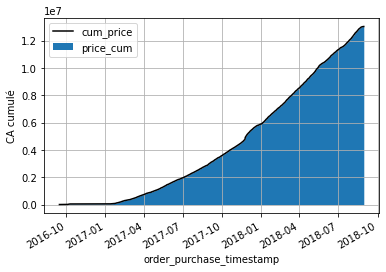

In [156]:
fig, ax = plt.subplots()
ax.plot(ddf_price_time['price_cum'], color='black', label='cum_price')
ax.legend()
ddf_price_time[['price_cum']].plot.area(ax=ax, linewidth=0)
plt.grid()
ax.set_ylabel('CA cumulé');


In [158]:
df_final_unique.columns

Index(['order_id', 'customer_unique_id', 'cat_mode_order',
       'total_weight_order', 'volume_totat_order_cm3', 'price',
       'pourcentage_livraison', 'nb_article', 'heure_commande',
       'temps_commande_reception', 'order_purchase_timestamp',
       'nombre_review_commande', 'review_score', 'semaine_vs_weekend',
       'cat_creneautravailoupas', 'Distance_cust_seller_km',
       'geolocation_lat_sellers', 'geolocation_lng_sellers', 'customer_state'],
      dtype='object')

In [ ]:
df_final_unique.shape,df_final_unique.order_id.nunique()

In [ ]:
df_final_unique.cat_mode_order.mode()

In [ ]:
df_final_unique.head()

In [ ]:
test_.shape

In [ ]:
test_.cat_mode_order.value_counts()

In [159]:
df_final_unique.to_csv('Dataset_joined.csv',index=False)

In [162]:
gb=df_final_unique.groupby('customer_unique_id')

On peut à présent s'intéresser à notre base de données en prenant en compte l'ensemble des informations: donc tous les utilisateurs

In [164]:
gb.order_purchase_timestamp.count().value_counts()

1     89316
2      2520
3       175
4        29
5         9
6         3
7         3
9         1
14        1
Name: order_purchase_timestamp, dtype: int64

In [166]:
df_final_unique.columns

Index(['order_id', 'customer_unique_id', 'cat_mode_order',
       'total_weight_order', 'volume_totat_order_cm3', 'price',
       'pourcentage_livraison', 'nb_article', 'heure_commande',
       'temps_commande_reception', 'order_purchase_timestamp',
       'nombre_review_commande', 'review_score', 'semaine_vs_weekend',
       'cat_creneautravailoupas', 'Distance_cust_seller_km',
       'geolocation_lat_sellers', 'geolocation_lng_sellers', 'customer_state'],
      dtype='object')

In [282]:
df_by_cust=gb.agg({'order_id':'count',
        'cat_mode_order':lambda x:x.value_counts().index[0],
        'temps_commande_reception':'mean',
        'total_weight_order':'mean',
        'volume_totat_order_cm3':'mean',
        'price':'mean',
        'pourcentage_livraison':'mean',
        'nb_article':'mean',
        'order_purchase_timestamp':'max',
        'review_score':'mean',
        'semaine_vs_weekend':lambda x:x.value_counts().index[0],
        'cat_creneautravailoupas':lambda x:x.value_counts().index[0],
        'Distance_cust_seller_km':'mean',
        'geolocation_lat_sellers':'mean',
        'geolocation_lng_sellers':'mean',
        'customer_state':lambda x:x.value_counts().index[0]})

In [177]:
df_by_cust.order_id.value_counts().index[0]

1

In [208]:
df_prod_otherviews = pd.merge(order_item, products,
               how="left",
               on="product_id").merge(prod_cat,
                                      on='product_category_name',
                                      how='left')


In [209]:
df_prod_otherviews

order_id                        product_id  \
0       00010242fe8c5a6d1ba2dd792cb16214  4244733e06e7ecb4970a6e2683c13e61   
1       00018f77f2f0320c557190d7a144bdd3  e5f2d52b802189ee658865ca93d83a8f   
2       000229ec398224ef6ca0657da4fc703e  c777355d18b72b67abbeef9df44fd0fd   
3       00024acbcdf0a6daa1e931b038114c75  7634da152a4610f1595efa32f14722fc   
4       00042b26cf59d7ce69dfabb4e55b4fd9  ac6c3623068f30de03045865e4e10089   
...                                  ...                               ...   
112645  fffc94f6ce00a00581880bf54a75a037  4aa6014eceb682077f9dc4bffebc05b0   
112646  fffcd46ef2263f404302a634eb57f7eb  32e07fd915822b0765e448c4dd74c828   
112647  fffce4705a9662cd70adb13d4a31832d  72a30483855e2eafc67aee5dc2560482   
112648  fffe18544ffabc95dfada21779c9644f  9c422a519119dcad7575db5af1ba540e   
112649  fffe41c64501cc87c801fd61db3f6244  350688d9dc1e75ff97be326363655e01   

                               seller_id   price  freight_value  \
0       48436dade18ac8b2bce089ec2a041202   58.90          13.29   
1       dd7ddc04e1b6c2c614352b383efe2d36  239.90          19.93   
2       5b51032eddd242adc84c38acab88f23d  199.00          17.87   
3       9d7a1d34a5052409006425275ba1c2b4   12.99          12.79   
4       df560393f3a51e74553ab94004ba5c87  199.90          18.14   
...                                  ...     ...            ...   
112645  b8bc237ba3788b23da09c0f1f3a3288c  299.99          43.41   
112646  f3c38ab652836d21de61fb8314b69182  350.00          36.53   
112647  c3cfdc648177fdbbbb35635a37472c53   99.90          16.95   
112648  2b3e4a2a3ea8e01938cabda2a3e5cc79   55.99           8.72   
112649  f7ccf836d21b2fb1de37564105216cc1   43.00          12.79   

         product_category_name  product_name_lenght  \
0                   cool_stuff                 58.0   
1                     pet_shop                 56.0   
2             moveis_decoracao                 59.0   
3                   perfumaria                 42.0   
4           ferramentas_jardim                 59.0   
...                        ...                  ...   
112645   utilidades_domesticas                 43.0   
112646  informatica_acessorios                 31.0   
112647           esporte_lazer                 43.0   
112648  informatica_acessorios                 56.0   
112649         cama_mesa_banho                 47.0   

        product_description_lenght  product_photos_qty  product_weight_g  \
0                            598.0                 4.0             650.0   
1                            239.0                 2.0           30000.0   
2                            695.0                 2.0            3050.0   
3                            480.0                 1.0             200.0   
4                            409.0                 1.0            3750.0   
...                            ...                 ...               ...   
112645                      1002.0                 3.0           10150.0   
112646                       232.0                 1.0            8950.0   
112647                       869.0                 1.0             967.0   
112648                      1306.0                 1.0             100.0   
112649                       511.0                 1.0             600.0   

        product_length_cm  product_height_cm  product_width_cm  \
0                    28.0                9.0              14.0   
1                    50.0               30.0              40.0   
2                    33.0               13.0              33.0   
3                    16.0               10.0              15.0   
4                    35.0               40.0              30.0   
...                   ...                ...               ...   
112645               89.0               15.0              40.0   
112646               45.0               26.0              38.0   
112647               21.0               24.0              19.0   
112648               20.0               20.0            

In [210]:
df_prod_otherviews.drop(['seller_id','product_id','price','freight_value','product_name_lenght','product_description_lenght','product_photos_qty',
                         'product_weight_g','product_length_cm','product_height_cm','product_width_cm','product_category_name'],axis=1,inplace=True)

In [211]:
df_prod_otherviews.product_category_name_english.replace(dict_rename,inplace=True)

In [212]:
df_prod_otherviews

order_id product_category_name_english
0       00010242fe8c5a6d1ba2dd792cb16214                   consommable
1       00018f77f2f0320c557190d7a144bdd3                   consommable
2       000229ec398224ef6ca0657da4fc703e                      vetement
3       00024acbcdf0a6daa1e931b038114c75                   consommable
4       00042b26cf59d7ce69dfabb4e55b4fd9                service_outils
...                                  ...                           ...
112645  fffc94f6ce00a00581880bf54a75a037                   consommable
112646  fffcd46ef2263f404302a634eb57f7eb                    multimedia
112647  fffce4705a9662cd70adb13d4a31832d                      vetement
112648  fffe18544ffabc95dfada21779c9644f                    multimedia
112649  fffe41c64501cc87c801fd61db3f6244                        maison

[112650 rows x 2 columns]

In [213]:
test=df_final_unique.merge(df_prod_otherviews,on='order_id',how='left')

In [216]:
test.dropna(inplace=True)

In [217]:
categories_customers = test.groupby(["customer_unique_id", "product_category_name_english"])\
                        .agg({"order_id": "count"}).unstack()


In [218]:
categories_customers

order_id                                   \
product_category_name_english    consommable maison multimedia service_outils   
customer_unique_id                                                              
0000366f3b9a7992bf8c76cfdf3221e2         NaN    1.0        NaN            NaN   
0000b849f77a49e4a4ce2b2a4ca5be3f         1.0    NaN        NaN            NaN   
0000f46a3911fa3c0805444483337064         NaN    NaN        1.0            NaN   
0000f6ccb0745a6a4b88665a16c9f078         NaN    NaN        1.0            NaN   
0004aac84e0df4da2b147fca70cf8255         NaN    NaN        1.0            NaN   
...                                      ...    ...        ...            ...   
fffcf5a5ff07b0908bd4e2dbc735a684         2.0    NaN        NaN            NaN   
fffea47cd6d3cc0a88bd621562a9d061         1.0    NaN        NaN            NaN   
ffff371b4d645b6ecea244b27531430a         NaN    NaN        NaN            1.0   
ffff5962728ec6157033ef9805bacc48         NaN    NaN        1.0            NaN   
ffffd2657e2aad2907e67c3e9daecbeb         1.0    NaN        NaN            NaN   

                                           
product_category_name_english    vetement  
customer_unique_id                         
0000366f3b9a7992bf8c76cfdf3221e2      NaN  
0000b849f77a49e4a4ce2b2a4ca5be3f      NaN  
0000f46a3911fa3c0805444483337064      NaN  
0000f6ccb0745a6a4b88665a16c9f078      NaN  
0004aac84e0df4da2b147fca70cf8255      NaN  
...                                   ...  
fffcf5a5ff07b0908bd4e2dbc735a684      NaN  
fffea47cd6d3cc0a88bd621562a9d061      NaN  
ffff371b4d645b6ecea244b27531430a      NaN  
ffff5962728ec6157033ef9805bacc48      NaN  
ffffd2657e2aad2907e67c3e9daecbeb      NaN  

[92057 rows x 5 columns]

In [221]:
categories_customers.columns

Index(['consommable', 'maison', 'multimedia', 'service_outils', 'vetement'], dtype='object', name='product_category_name_english')

In [222]:
categories_customers.fillna(0, inplace=True)


In [223]:
categories_customers["total_items"] = categories_customers.sum(axis=1)


In [241]:
categories_customers.nunique()

product_category_name_english
consommable       14
maison            13
multimedia        17
service_outils    14
vetement          13
total_items       19
dtype: int64

In [228]:
categories_customers.shape,test.shape

((92057, 6), (108614, 20))

In [234]:
(gb.nb_article.sum()==categories_customers.total_items).value_counts()

True     91996
False       61
dtype: int64

In [233]:
gb.nb_article.sum()

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    1
0000b849f77a49e4a4ce2b2a4ca5be3f    1
0000f46a3911fa3c0805444483337064    1
0000f6ccb0745a6a4b88665a16c9f078    1
0004aac84e0df4da2b147fca70cf8255    1
                                   ..
fffcf5a5ff07b0908bd4e2dbc735a684    2
fffea47cd6d3cc0a88bd621562a9d061    1
ffff371b4d645b6ecea244b27531430a    1
ffff5962728ec6157033ef9805bacc48    1
ffffd2657e2aad2907e67c3e9daecbeb    1
Name: nb_article, Length: 92057, dtype: int64

C:\Users\miche\OneDrive\Bureau\Formation Data Science\Projet5\P5\fcts_p5.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels=labels,rotation=rot_bar)


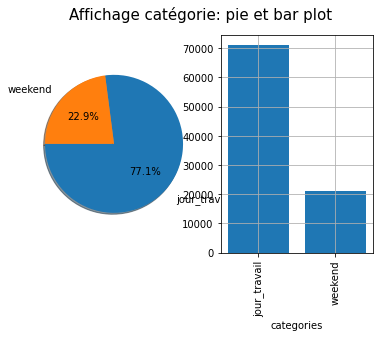

<Figure size 432x288 with 0 Axes>

In [244]:
fct.piebar_categorie(df_by_cust.semaine_vs_weekend)

C:\Users\miche\OneDrive\Bureau\Formation Data Science\Projet5\P5\fcts_p5.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels=labels,rotation=rot_bar)


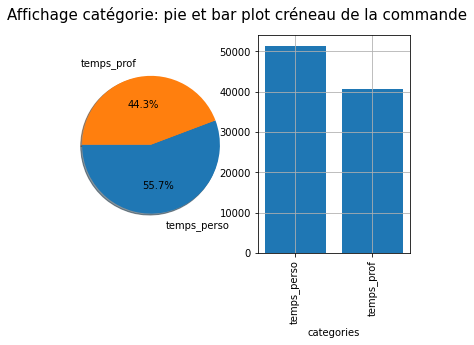

<Figure size 432x288 with 0 Axes>

In [247]:
fct.piebar_categorie(df_by_cust.cat_creneautravailoupas,name=' créneau de la commande')

C:\Users\miche\OneDrive\Bureau\Formation Data Science\Projet5\P5\fcts_p5.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels=labels,rotation=rot_bar)


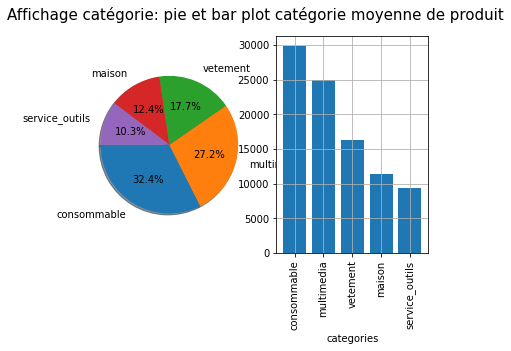

<Figure size 432x288 with 0 Axes>

In [248]:
fct.piebar_categorie(df_by_cust.cat_mode_order,name=' catégorie moyenne de produit')

[(0.0, 6.0),

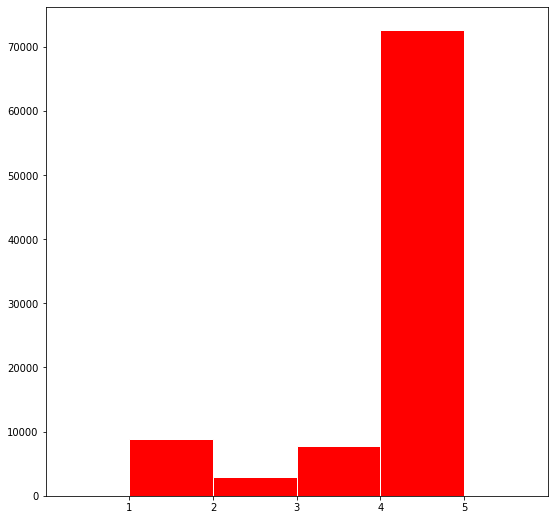

In [257]:

fig, ax = plt.subplots(figsize = (9, 9))

#plot
ax.hist(df_by_cust.review_score, bins=[1, 2, 3, 4,5], edgecolor="white",color='red')
ax.set(xlim=(0, 6), xticks=np.arange(1, 6),
       )

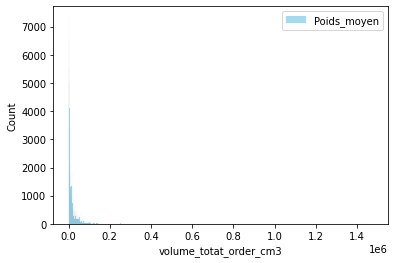

In [260]:
sns.histplot(data=df_by_cust, x="volume_totat_order_cm3", color="skyblue", label="Poids_moyen")
plt.legend() 
plt.show()

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(data=df, x="sepal_length", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="sepal_width", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="petal_length", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="petal_width", kde=True, color="teal", ax=axs[1, 1])

plt.show()

<AxesSubplot:xlabel='review_score', ylabel='Count'>

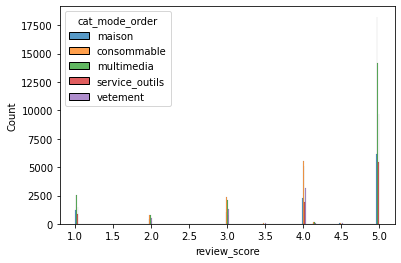

In [264]:
sns.histplot(data=df_by_cust, x="review_score", hue="cat_mode_order", multiple="dodge")


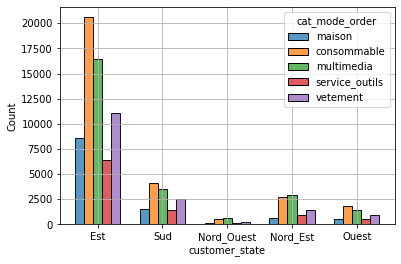

In [268]:
sns.histplot(data=df_by_cust, x="customer_state", hue="cat_mode_order", multiple="dodge",shrink=.7)
plt.grid()

C:\Users\miche\OneDrive\Bureau\Formation Data Science\Projet5\P5\fcts_p5.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels=labels,rotation=rot_bar)


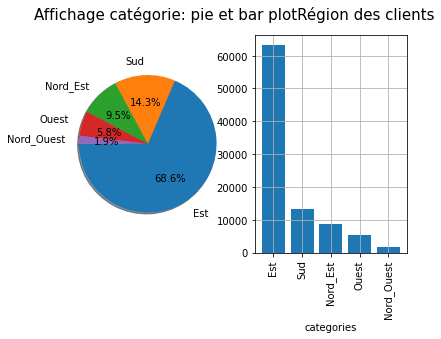

<Figure size 432x288 with 0 Axes>

In [270]:
fct.piebar_categorie(df_by_cust.customer_state,name='Région des clients')

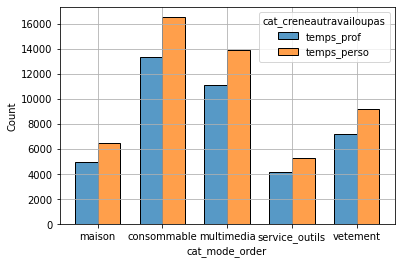

In [271]:
sns.histplot(data=df_by_cust, x="cat_mode_order", hue="cat_creneautravailoupas", multiple="dodge",shrink=.7)
plt.grid()

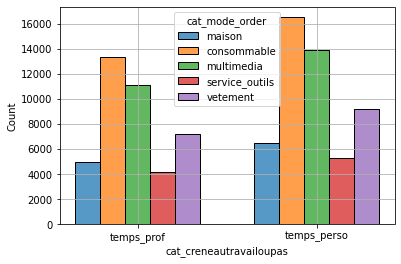

In [272]:
sns.histplot(data=df_by_cust, x="cat_creneautravailoupas", hue="cat_mode_order", multiple="dodge",shrink=.7)
plt.grid()

In [273]:
sns.histplot(data=df_by_cust, x="semaine_vs_weekend", hue="cat_mode_order", multiple="dodge",shrink=.7)
plt.grid()

In [258]:
df_by_cust.columns

Index(['order_id', 'cat_mode_order', 'total_weight_order',
       'volume_totat_order_cm3', 'price', 'pourcentage_livraison',
       'nb_article', 'order_purchase_timestamp', 'review_score',
       'semaine_vs_weekend', 'cat_creneautravailoupas',
       'Distance_cust_seller_km', 'geolocation_lat_sellers',
       'geolocation_lng_sellers', 'customer_state'],
      dtype='object')

<AxesSubplot:xlabel='geolocation_lng_sellers', ylabel='geolocation_lat_sellers'>

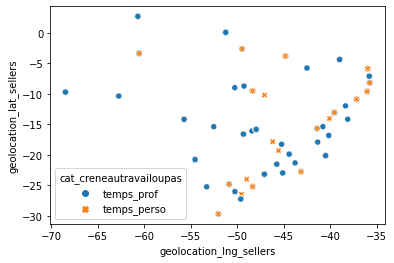

In [276]:
sns.scatterplot(data=df_by_cust, x="geolocation_lng_sellers", y="geolocation_lat_sellers", hue="cat_creneautravailoupas", style="cat_creneautravailoupas")


<AxesSubplot:xlabel='geolocation_lng_sellers', ylabel='geolocation_lat_sellers'>

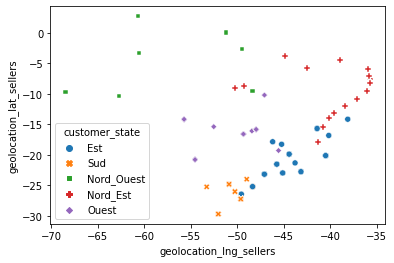

In [278]:
sns.scatterplot(data=df_by_cust, x="geolocation_lng_sellers", y="geolocation_lat_sellers", hue="customer_state", style="customer_state")


<AxesSubplot:xlabel='geolocation_lng_sellers', ylabel='geolocation_lat_sellers'>

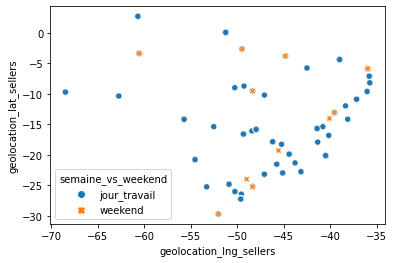

In [279]:
sns.scatterplot(data=df_by_cust, x="geolocation_lng_sellers", y="geolocation_lat_sellers", hue="semaine_vs_weekend", style="semaine_vs_weekend")


In [277]:
df_by_cust.columns

Index(['order_id', 'cat_mode_order', 'total_weight_order',
       'volume_totat_order_cm3', 'price', 'pourcentage_livraison',
       'nb_article', 'order_purchase_timestamp', 'review_score',
       'semaine_vs_weekend', 'cat_creneautravailoupas',
       'Distance_cust_seller_km', 'geolocation_lat_sellers',
       'geolocation_lng_sellers', 'customer_state'],
      dtype='object')

In [281]:
test

order_id                customer_unique_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
1       53cdb2fc8bc7dce0b6741e2150273451  af07308b275d755c9edb36a90c618231   
2       47770eb9100c2d0c44946d9cf07ec65d  3a653a41f6f9fc3d2a113cf8398680e8   
3       949d5b44dbf5de918fe9c16f97b45f8a  7c142cf63193a1473d2e66489a9ae977   
4       ad21c59c0840e6cb83a9ceb5573f8159  72632f0f9dd73dfee390c9b22eb56dd6   
...                                  ...                               ...   
108680  63943bddc261676b46f01ca7ac2f7bd8  da62f9e57a76d978d02ab5362c509660   
108681  83c1379a015df1e13d02aae0204711ab  737520a9aad80b3fbbdad19b66b37b30   
108682  11c177c8e97725db2631073c19f07b62  5097a5312c8b157bb7be58ae360ef43c   
108683  11c177c8e97725db2631073c19f07b62  5097a5312c8b157bb7be58ae360ef43c   
108684  66dea50a8b16d9b4dee7af250b4be1a5  60350aa974b26ff12caad89e55993bd6   

        cat_mode_order  total_weight_order  volume_totat_order_cm3   price  \
0          consommable               500.0                  1976.0   29.99   
1          consommable               400.0                  4693.0  118.70   
2       service_outils               420.0                  9576.0  159.90   
3          consommable               450.0                  6000.0   45.00   
4           multimedia               250.0                 11475.0   19.90   
...                ...                 ...                     ...     ...   
108680     consommable              4950.0                 16000.0  174.90   
108681          maison             13300.0                 63360.0  205.99   
108682      multimedia             13100.0                 16000.0  359.98   
108683      multimedia             13100.0                 16000.0  359.98   
108684     consommable               150.0                  1680.0   68.50   

        pourcentage_livraison  nb_article  heure_commande  \
0                    0.225265           1              10   
1                    0.160894           1              20   
2                    0.107302           1               8   
3                    0.376731           1              19   
4                    0.304682           1              21   
...                       ...         ...             ...   
108680               0.103077           1              12   
108681               0.239917           1              14   
108682               0.184015           2              21   
108683               0.184015           2              21   
108684               0.211375           1              20   

        temps_commande_reception order_purchase_timestamp  \
0                            8.0      2017-10-02 10:56:33   
1                           13.0      2018-07-24 20:41:37   
2                            9.0      2018-08-08 08:38:49   
3                           13.0      2017-11-18 19:28:06   
4                            2.0      2018-02-13 21:18:39   
...                          ...                      ...   
108680                      22.0      2018-02-06 12:58:58   
108681                      24.0      2017-08-27 14:46:43   
108682                      17.0      2018-01-08 21:28:27   
108683                      17.0      2018-01-08 21:28:27   
108684                       7.0      2018-03-08 20:57:30   

        nombre_review_commande  review_score semaine_vs_weekend  \
0                          1.0           4.0       jour_travail   
1                          1.0           4.0       jour_travail   
2                          1.0           5.0       jour_travail   
3                          1.0           5.0            weekend   
4                          1.0           5.0       jour_travail   
...                        ...           ...                ...   
108680                     1.0           4.0       jour_travail   
108681                     1.0           5.0            weekend   
108682                     1.0           2.0       jour_travail   
108683                

In [ ]:
lst_num=['total_weight_order','volume_totat_order_cm3', 'price', 'pourcentage_livraison']
         

EDA

In [148]:
data=pd.read_csv('Dataset_joined.csv')

In [4]:
data.head()

order_id                customer_unique_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
1  53cdb2fc8bc7dce0b6741e2150273451  af07308b275d755c9edb36a90c618231   
2  47770eb9100c2d0c44946d9cf07ec65d  3a653a41f6f9fc3d2a113cf8398680e8   
3  949d5b44dbf5de918fe9c16f97b45f8a  7c142cf63193a1473d2e66489a9ae977   
4  ad21c59c0840e6cb83a9ceb5573f8159  72632f0f9dd73dfee390c9b22eb56dd6   

   cat_mode_order  total_weight_order  volume_totat_order_cm3   price  \
0     consommable               500.0                  1976.0   29.99   
1     consommable               400.0                  4693.0  118.70   
2  service_outils               420.0                  9576.0  159.90   
3     consommable               450.0                  6000.0   45.00   
4      multimedia               250.0                 11475.0   19.90   

   pourcentage_livraison  nb_article  heure_commande  \
0               0.225265           1              10   
1               0.160894           1              20   
2               0.107302           1               8   
3               0.376731           1              19   
4               0.304682           1              21   

   temps_commande_reception order_purchase_timestamp  nombre_review_commande  \
0                       8.0      2017-10-02 10:56:33                     1.0   
1                      13.0      2018-07-24 20:41:37                     1.0   
2                       9.0      2018-08-08 08:38:49                     1.0   
3                      13.0      2017-11-18 19:28:06                     1.0   
4                       2.0      2018-02-13 21:18:39                     1.0   

   review_score semaine_vs_weekend cat_creneautravailoupas  \
0           4.0       jour_travail              temps_prof   
1           4.0       jour_travail             temps_perso   
2           5.0       jour_travail             temps_perso   
3           5.0            weekend             temps_perso   
4           5.0       jour_travail             temps_perso   

   Distance_cust_seller_km  geolocation_lat_sellers  geolocation_lng_sellers  \
0                 0.000000               -23.155308               -47.084074   
1              1375.789636               -13.049361               -39.560649   
2               768.269422               -16.577645               -49.334195   
3              1804.635910                -5.856702               -35.990079   
4                 0.000000               -23.155308               -47.084074   

  customer_state  
0            Est  
1       Nord_Est  
2          Ouest  
3       Nord_Est  
4            Est

In [149]:
data.order_purchase_timestamp=data.order_purchase_timestamp.apply(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

In [21]:
(data.order_purchase_timestamp.max()-data.order_purchase_timestamp).apply(lambda x:x.days)

0        331
1         35
2         21
3        283
4        196
        ... 
95099    538
95100    204
95101    367
95102    232
95103    173
Name: order_purchase_timestamp, Length: 95104, dtype: int64

In [150]:
date_max=data.order_purchase_timestamp.max()

In [27]:
data.groupby('customer_unique_id').agg({'order_purchase_timestamp':lambda x:(date_max-x.max()).days})

order_purchase_timestamp
customer_unique_id                                        
0000366f3b9a7992bf8c76cfdf3221e2                       111
0000b849f77a49e4a4ce2b2a4ca5be3f                       114
0000f46a3911fa3c0805444483337064                       536
0000f6ccb0745a6a4b88665a16c9f078                       320
0004aac84e0df4da2b147fca70cf8255                       287
...                                                    ...
fffcf5a5ff07b0908bd4e2dbc735a684                       446
fffea47cd6d3cc0a88bd621562a9d061                       261
ffff371b4d645b6ecea244b27531430a                       567
ffff5962728ec6157033ef9805bacc48                       118
ffffd2657e2aad2907e67c3e9daecbeb                       483

[92057 rows x 1 columns]

In [151]:
df=data.groupby('customer_unique_id').agg({'price':'mean',
                                          'pourcentage_livraison':'mean',
                                          'temps_commande_reception':'mean',
                                          'review_score':'mean',
                                          'cat_creneautravailoupas':lambda x:x.value_counts().index[0],
                                          'Distance_cust_seller_km':'mean',
                                          'cat_mode_order':lambda x:x.value_counts().index[0],
                                          'total_weight_order':'mean',
                                          'nb_article':'mean',
                                          'customer_state':lambda x:x.value_counts().index[0],
                                          'order_purchase_timestamp':lambda x:(date_max-x.max()).days
                                         })
                                          

In [152]:
df.head()

price  pourcentage_livraison  \
customer_unique_id                                                
0000366f3b9a7992bf8c76cfdf3221e2  129.90               0.084567   
0000b849f77a49e4a4ce2b2a4ca5be3f   18.90               0.304892   
0000f46a3911fa3c0805444483337064   69.00               0.199722   
0000f6ccb0745a6a4b88665a16c9f078   25.99               0.404172   
0004aac84e0df4da2b147fca70cf8255  180.00               0.085784   

                                  temps_commande_reception  review_score  \
customer_unique_id                                                         
0000366f3b9a7992bf8c76cfdf3221e2                       6.0           5.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                       3.0           4.0   
0000f46a3911fa3c0805444483337064                      25.0           3.0   
0000f6ccb0745a6a4b88665a16c9f078                      20.0           4.0   
0004aac84e0df4da2b147fca70cf8255                      13.0           5.0   

                                 cat_creneautravailoupas  \
customer_unique_id                                         
0000366f3b9a7992bf8c76cfdf3221e2              temps_prof   
0000b849f77a49e4a4ce2b2a4ca5be3f              temps_prof   
0000f46a3911fa3c0805444483337064             temps_perso   
0000f6ccb0745a6a4b88665a16c9f078             temps_perso   
0004aac84e0df4da2b147fca70cf8255             temps_perso   

                                  Distance_cust_seller_km cat_mode_order  \
customer_unique_id                                                         
0000366f3b9a7992bf8c76cfdf3221e2                 0.000000         maison   
0000b849f77a49e4a4ce2b2a4ca5be3f                 0.000000    consommable   
0000f46a3911fa3c0805444483337064               519.122328     multimedia   
0000f6ccb0745a6a4b88665a16c9f078              2296.795588     multimedia   
0004aac84e0df4da2b147fca70cf8255                 0.000000     multimedia   

                                  total_weight_order  nb_article  \
customer_unique_id                                                 
0000366f3b9a7992bf8c76cfdf3221e2              1500.0         1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f               375.0         1.0   
0000f46a3911fa3c0805444483337064              1500.0         1.0   
0000f6ccb0745a6a4b88665a16c9f078               150.0         1.0   
0004aac84e0df4da2b147fca70cf8255              6050.0         1.0   

                                 customer_state  order_purchase_timestamp  
customer_unique_id                                                         
0000366f3b9a7992bf8c76cfdf3221e2            Est                       111  
0000b849f77a49e4a4ce2b2a4ca5be3f            Est                       114  
0000f46a3911fa3c0805444483337064            Sud                       536  
0000f6ccb0745a6a4b88665a16c9f078     Nord_Ouest                       320  
0004aac84e0df4da2b147fca70cf8255            Est                       287

In [34]:
df.isna().mean()

price                       0.0
pourcentage_livraison       0.0
temps_commande_reception    0.0
review_score                0.0
cat_creneautravailoupas     0.0
Distance_cust_seller_km     0.0
cat_mode_order              0.0
total_weight_order          0.0
nb_article                  0.0
customer_state              0.0
order_purchase_timestamp    0.0
dtype: float64

In [153]:
num_cols=df.select_dtypes(include=['int64','float64']).columns
ctg_cols=df.select_dtypes(include=['object']).columns


In [40]:
len(num_cols),len(ctg_cols),df.shape

(8, 3, (92057, 11))

In [43]:

import warnings
warnings.filterwarnings('ignore')

In [52]:
df.review_score=df.review_score.apply(lambda x:int(x))

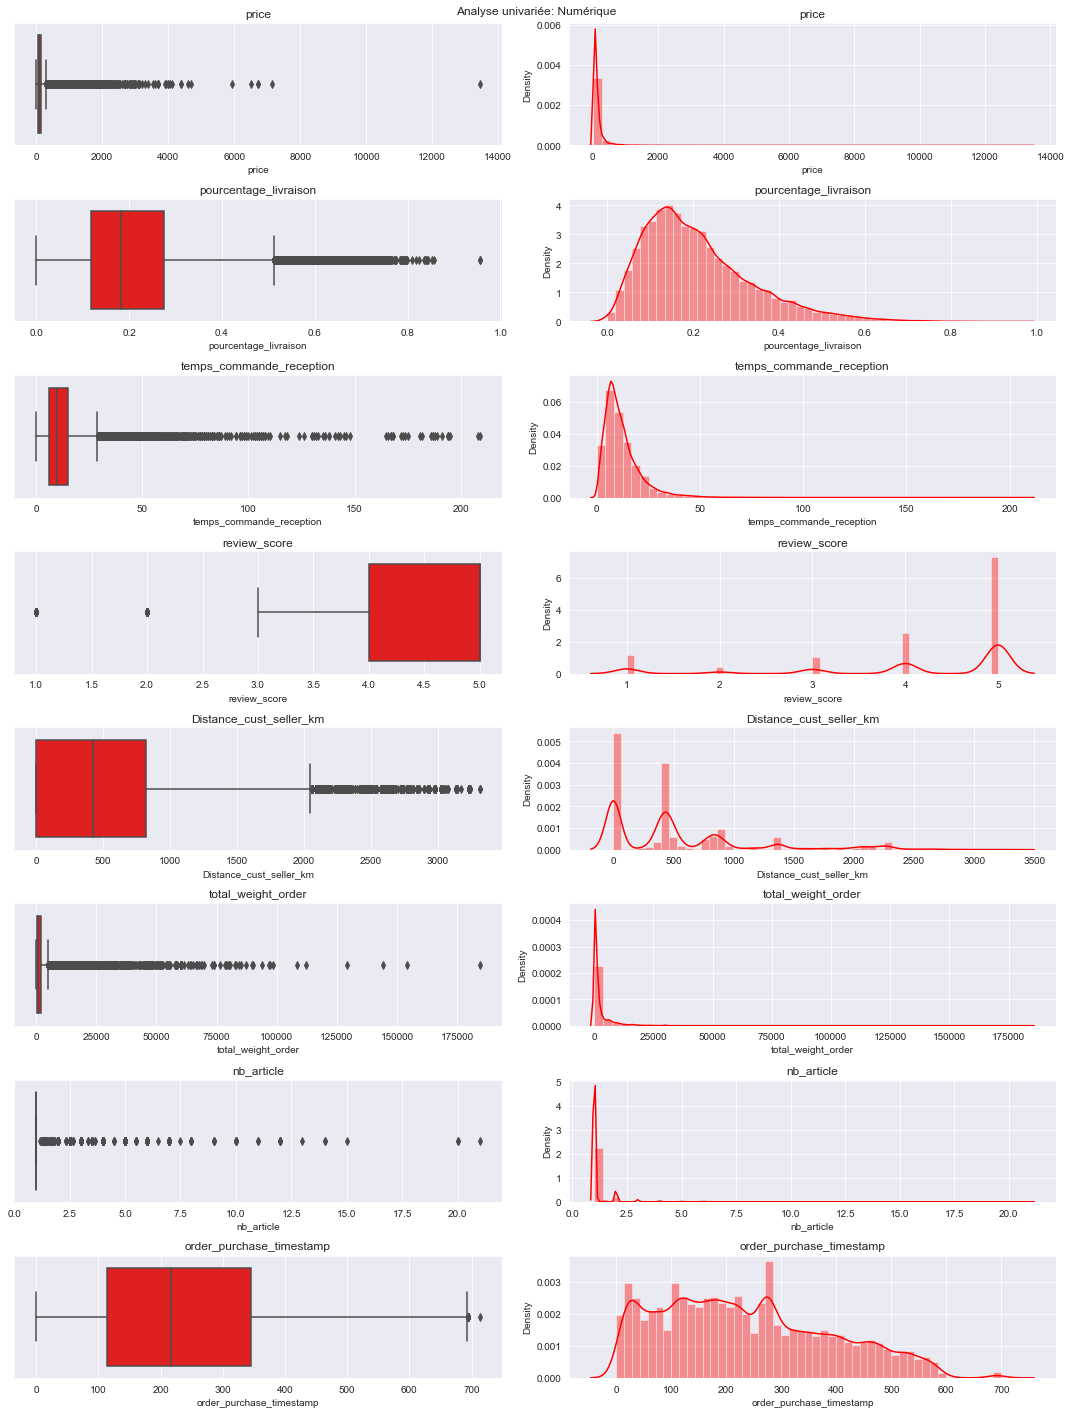

In [56]:
fig, ax = plt.subplots(len(num_cols),2,figsize=(15, 20))
same_feat=True
sns.set_style("darkgrid")
for i,col in enumerate(num_cols):
    for j in range(2):
        sns.set_style("darkgrid")
        if same_feat==True:
            sns.boxplot(df[col],ax=ax[i,j],color='red')
            ax[i,j].set_title(col)
            
            same_feat=False
        else:
            sns.distplot(df[col],ax=ax[i,j],color='red')
            ax[i,j].set_title(col)
            same_feat=True
plt.suptitle("Analyse univariée: Numérique")
plt.tight_layout()
plt.show()

In [159]:
df.price.describe()

count    92057.000000
mean       137.613535
std        209.674393
min          0.850000
25%         46.400000
50%         86.970000
75%        149.900000
max      13440.000000
Name: price, dtype: float64

In [165]:
df_trlog=df.copy()

In [166]:
num_cols

Index(['price', 'pourcentage_livraison', 'temps_commande_reception',
       'review_score', 'Distance_cust_seller_km', 'total_weight_order',
       'nb_article', 'order_purchase_timestamp'],
      dtype='object')

In [167]:
df_trlog[['price','total_weight_order','Distance_cust_seller_km','temps_commande_reception']]=np.log10(1+df_trlog[['price','total_weight_order','Distance_cust_seller_km','temps_commande_reception']])

In [164]:
(np.log10(1+df.price))

<AxesSubplot:xlabel='price', ylabel='Density'>

In [168]:
fig, ax = plt.subplots(len(num_cols),2,figsize=(15, 20))
same_feat=True
sns.set_style("darkgrid")
for i,col in enumerate(num_cols):
    for j in range(2):
        sns.set_style("darkgrid")
        if same_feat==True:
            sns.boxplot(df_trlog[col],ax=ax[i,j],color='red')
            ax[i,j].set_title(col)
            
            same_feat=False
        else:
            sns.distplot(df_trlog[col],ax=ax[i,j],color='red')
            ax[i,j].set_title(col)
            same_feat=True
plt.suptitle("Analyse univariée: Numérique avec log")
plt.tight_layout()
plt.show()

In [61]:
num_cols.values.tolist()

['price',
 'pourcentage_livraison',
 'temps_commande_reception',
 'review_score',
 'Distance_cust_seller_km',
 'total_weight_order',
 'nb_article',
 'order_purchase_timestamp']

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='pourcentage_livraison', ylabel='price'>,
        <AxesSubplot:xlabel='temps_commande_reception', ylabel='price'>,
        <AxesSubplot:xlabel='review_score', ylabel='price'>,
        <AxesSubplot:xlabel='Distance_cust_seller_km', ylabel='price'>,
        <AxesSubplot:xlabel='total_weight_order', ylabel='price'>,
        <AxesSubplot:xlabel='nb_article', ylabel='price'>,
        <AxesSubplot:xlabel='order_purchase_timestamp', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='pourcentage_livraison'>,
        <AxesSubplot:xlabel='pourcentage_livraison', ylabel='pourcentage_livraison'>,
        <AxesSubplot:xlabel='temps_commande_reception', ylabel='pourcentage_livraison'>,
        <AxesSubplot:xlabel='review_score', ylabel='pourcentage_livraison'>,
        <AxesSubplot:xlabel='Distance_cust_seller_km', ylabel='pourcentage_livraison'>,
        <AxesSubplot:xlabel='total_weight_order', ylabel='po

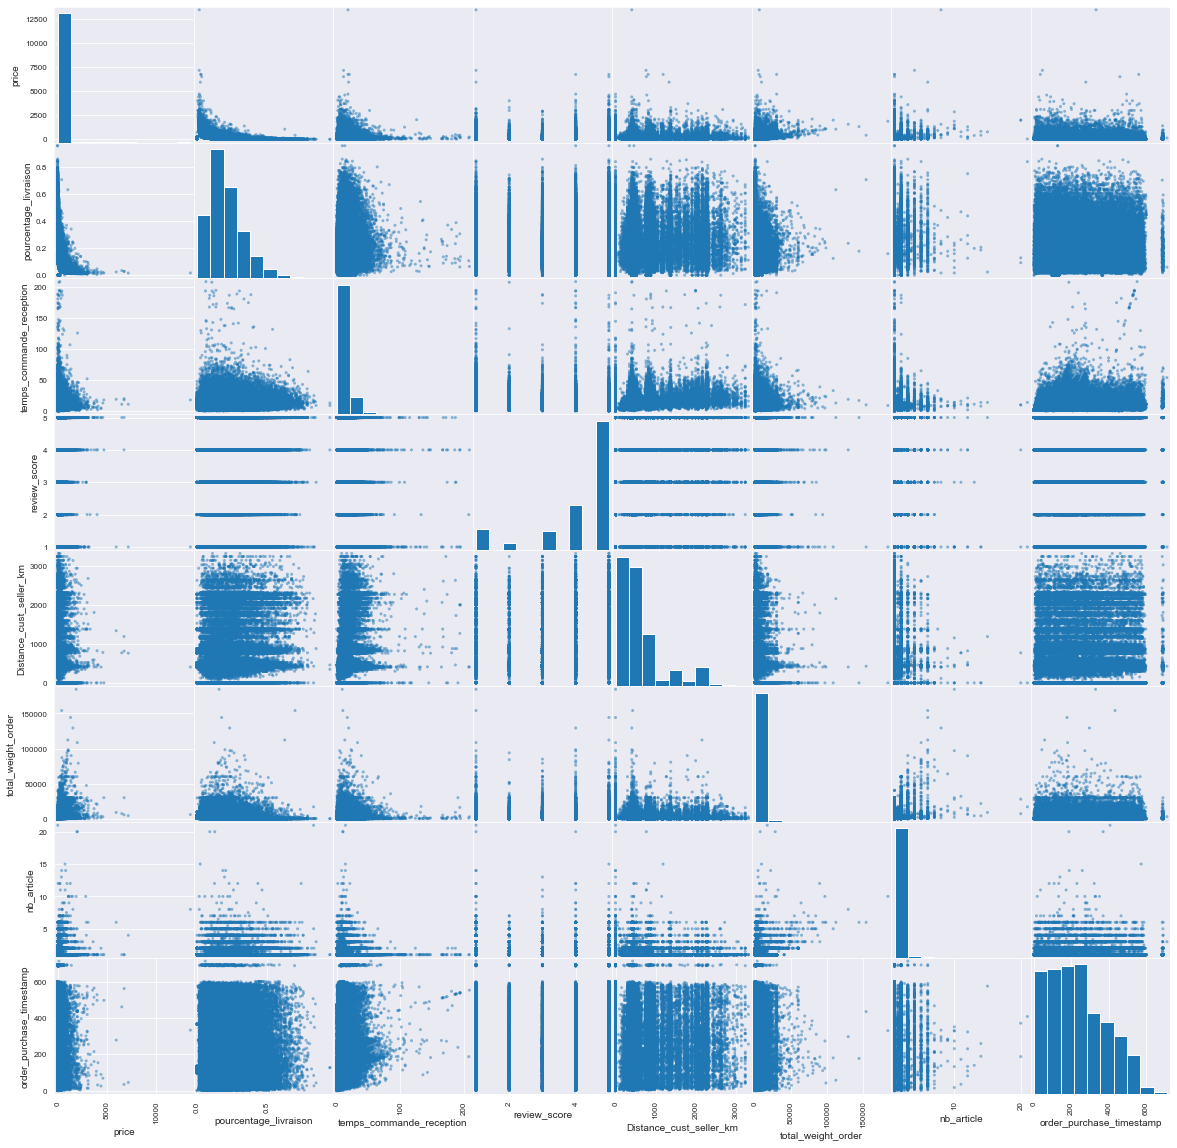

In [62]:
pd.plotting.scatter_matrix(df[num_cols.values.tolist()],alpha=0.5,figsize=(20,20),grid=True)

In [66]:
ax=sns.heatmap(df[num_cols.values.tolist()].corr(),annot=True,linewidths=.5,vmin=-1)
ax.set_title('Heatmap des corrélations')

Text(0.5, 1.0, 'Heatmap des corrélations')

In [67]:
ctg_cols

Index(['cat_creneautravailoupas', 'cat_mode_order', 'customer_state'], dtype='object')

In [73]:
fig, ax = plt.subplots(len(ctg_cols),1,figsize=(10, 15))
for i,col in enumerate(ctg_cols):
    sns.countplot(x=col, data=df,ax=ax[i])
    ax[i].set_title(col)
plt.suptitle("Analyse univariée: Catégorie")
plt.tight_layout()
plt.show()

In [78]:
from scipy.stats import chi2_contingency


In [74]:
pd.crosstab(df.customer_state,df.cat_creneautravailoupas)

cat_creneautravailoupas  temps_perso  temps_prof
customer_state                                  
Est                            35199       27913
Nord_Est                        5035        3665
Nord_Ouest                       927         785
Ouest                           2856        2495
Sud                             7301        5881

In [77]:
X = "customer_state"
Y = "cat_creneautravailoupas"

cont = df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

cat_creneautravailoupas  temps_perso  temps_prof  Total
customer_state                                         
Est                            35199       27913  63112
Nord_Est                        5035        3665   8700
Nord_Ouest                       927         785   1712
Ouest                           2856        2495   5351
Sud                             7301        5881  13182
Total                          51318       40739  92057

In [79]:
c, p, dof, expected = chi2_contingency(cont.iloc[:-1,:-1].fillna(0),correction=False) 
print('c vaut',c,'\n avec',dof,'deg de liberté \n et pvalue de',p)

c vaut 30.65876644657956 
 avec 4 deg de liberté 
 et pvalue de 3.5933807461823615e-06


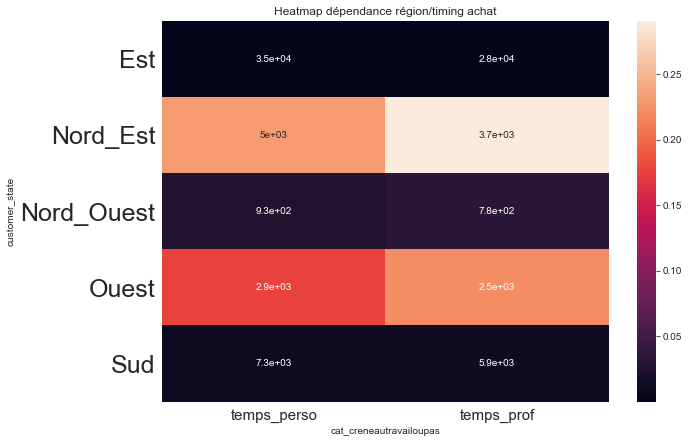

In [81]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df)
indep = tx.dot(ty) / n

measure = (cont.fillna(0)-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
plt.figure(figsize=(10,7))
plt.xticks(fontsize=15)
plt.yticks(fontsize=25)

ax=sns.heatmap(table.iloc[:-1,:-1],annot=cont.fillna(0).iloc[:-1,:-1])
ax.set_title('Heatmap dépendance région/timing achat')
plt.show()

In [75]:
pd.crosstab(df.cat_mode_order,df.cat_creneautravailoupas)

cat_creneautravailoupas  temps_perso  temps_prof
cat_mode_order                                  
consommable                    16533       13335
maison                          6496        4930
multimedia                     13881       11130
service_outils                  5266        4179
vetement                        9142        7165

In [84]:
X = "cat_mode_order"
Y = "cat_creneautravailoupas"

cont = df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")

c, p, dof, expected = chi2_contingency(cont.iloc[:-1,:-1].fillna(0),correction=False) 
print('c vaut',c,'\n avec',dof,'deg de liberté \n et pvalue de',p)
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df)
indep = tx.dot(ty) / n

measure = (cont.fillna(0)-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
plt.figure(figsize=(7,7))
plt.xticks(fontsize=15)
plt.yticks(fontsize=25)

ax=sns.heatmap(table.iloc[:-1,:-1],annot=cont.fillna(0).iloc[:-1,:-1])
ax.set_title('Heatmap dépendance Catégorie produit/timing achat')
plt.show()

c vaut 8.81342914599447 
 avec 4 deg de liberté 
 et pvalue de 0.06593585177419398


In [85]:
X = "cat_mode_order"
Y = "customer_state"

cont = df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")

c, p, dof, expected = chi2_contingency(cont.iloc[:-1,:-1].fillna(0),correction=False) 
print('c vaut',c,'\n avec',dof,'deg de liberté \n et pvalue de',p)
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df)
indep = tx.dot(ty) / n

measure = (cont.fillna(0)-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
plt.figure(figsize=(7,7))
plt.xticks(fontsize=15)
plt.yticks(fontsize=25)

ax=sns.heatmap(table.iloc[:-1,:-1],annot=cont.fillna(0).iloc[:-1,:-1])
ax.set_title('Heatmap dépendance cat_produit/Région achat')
plt.show()

c vaut 550.6439609953226 
 avec 16 deg de liberté 
 et pvalue de 6.558152505654142e-107


In [76]:
pd.crosstab(df.cat_mode_order,df.customer_state)

customer_state    Est  Nord_Est  Nord_Ouest  Ouest   Sud
cat_mode_order                                          
consommable     20589      2773         550   1817  4139
maison           8554       673         106    586  1507
multimedia      16456      2915         610   1466  3564
service_outils   6399       938         151    559  1398
vetement        11114      1401         295    923  2574

In [ ]:
fig, ax = plt.subplots(len(num_cols),3,figsize=(10, 15))
for i,col in enumerate(num_cols):
    

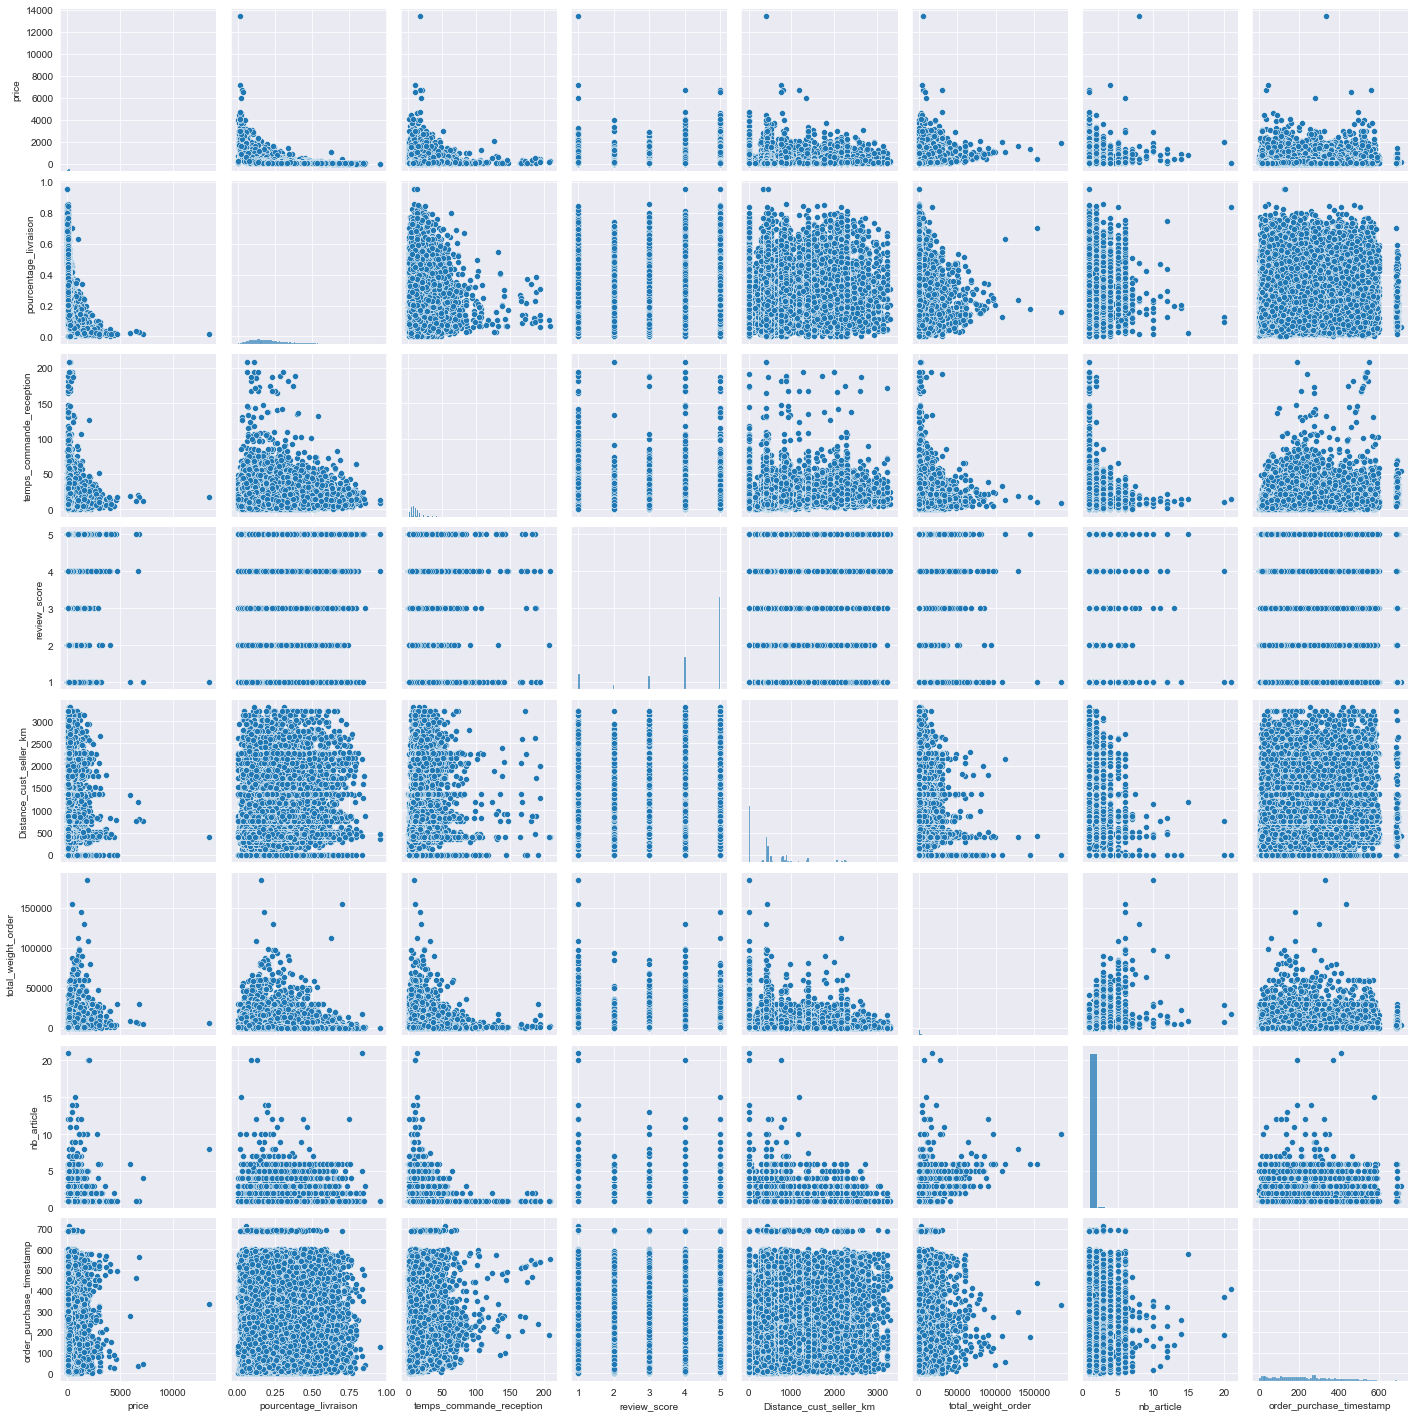

In [86]:
sns.pairplot(df[num_cols])


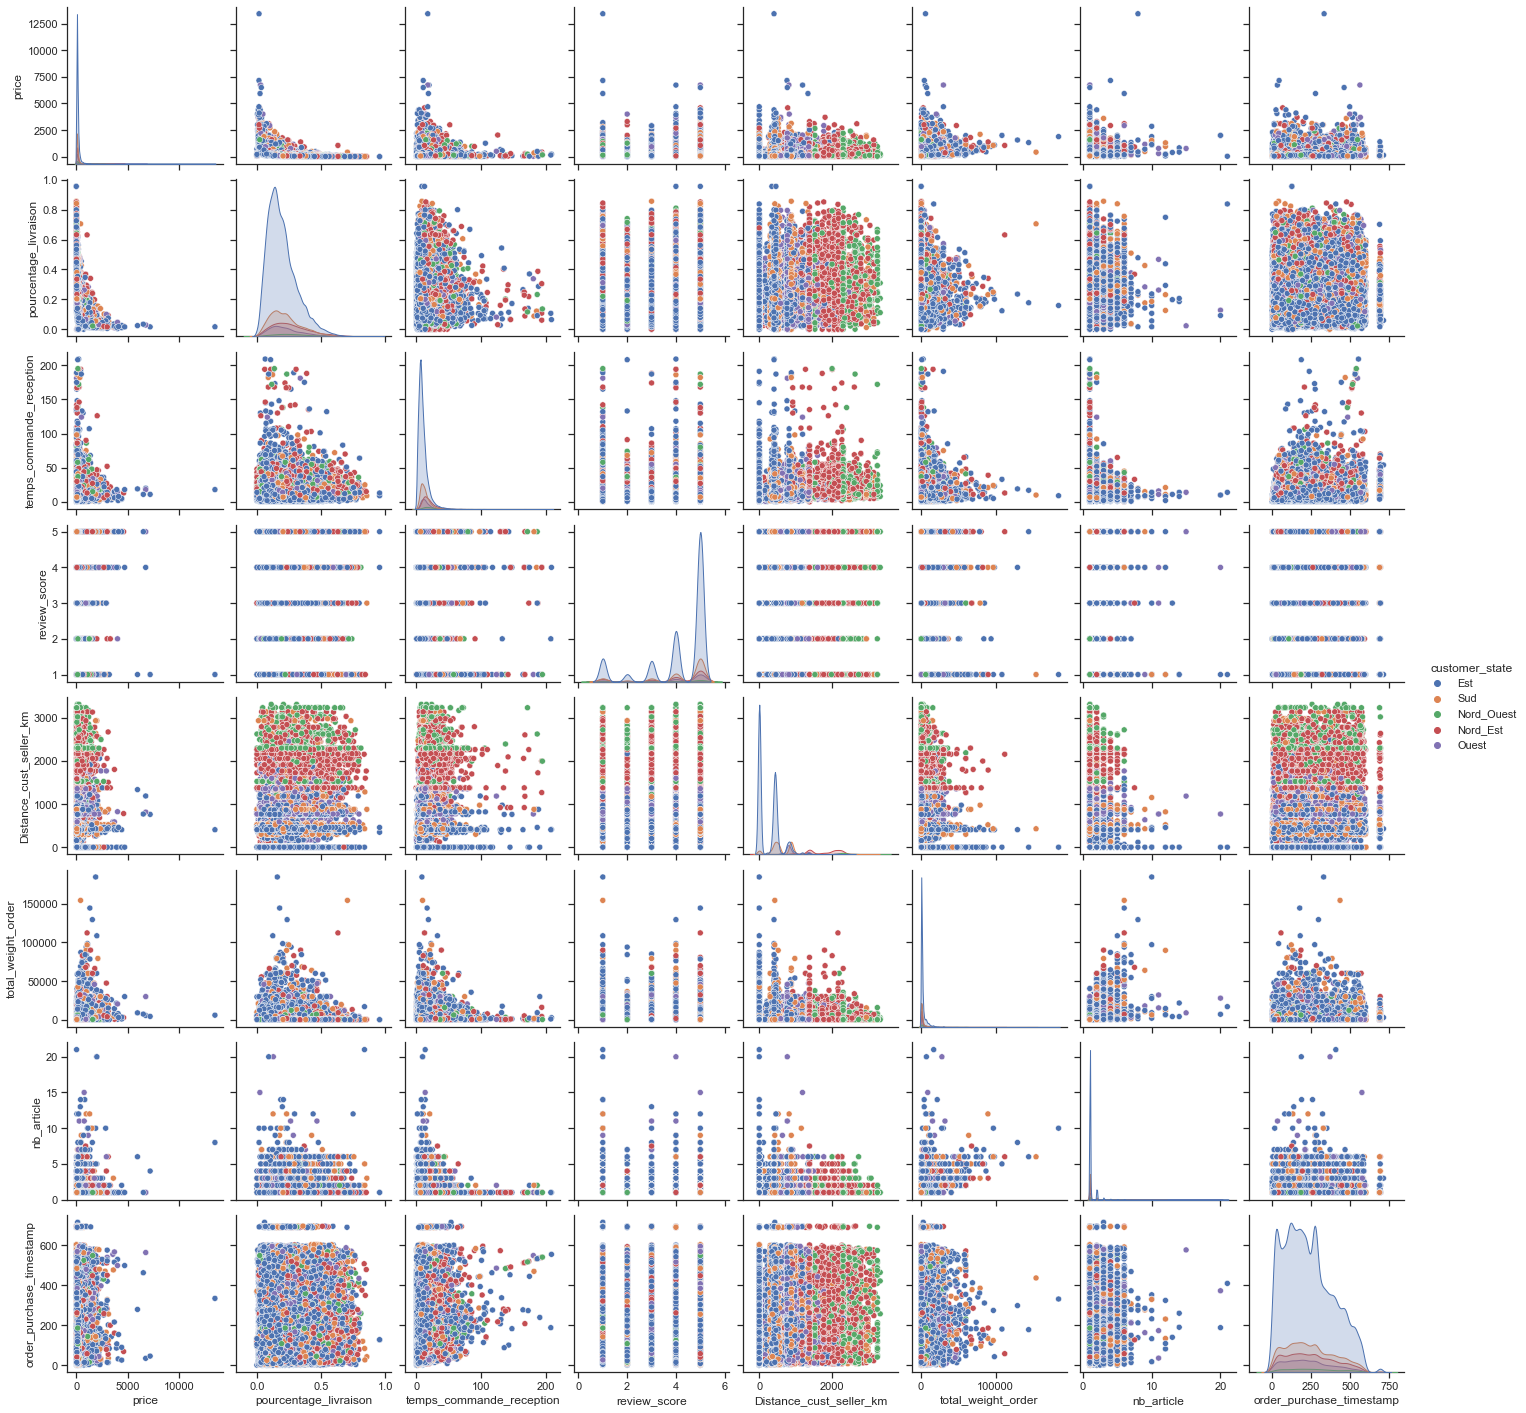

In [95]:
sns.set_theme(style="ticks")

sns.pairplot(df[num_cols.tolist()+['customer_state']],hue='customer_state')


In [96]:
sns.set_theme(style="ticks")

sns.pairplot(df[num_cols.tolist()+['cat_mode_order']],hue='cat_mode_order')


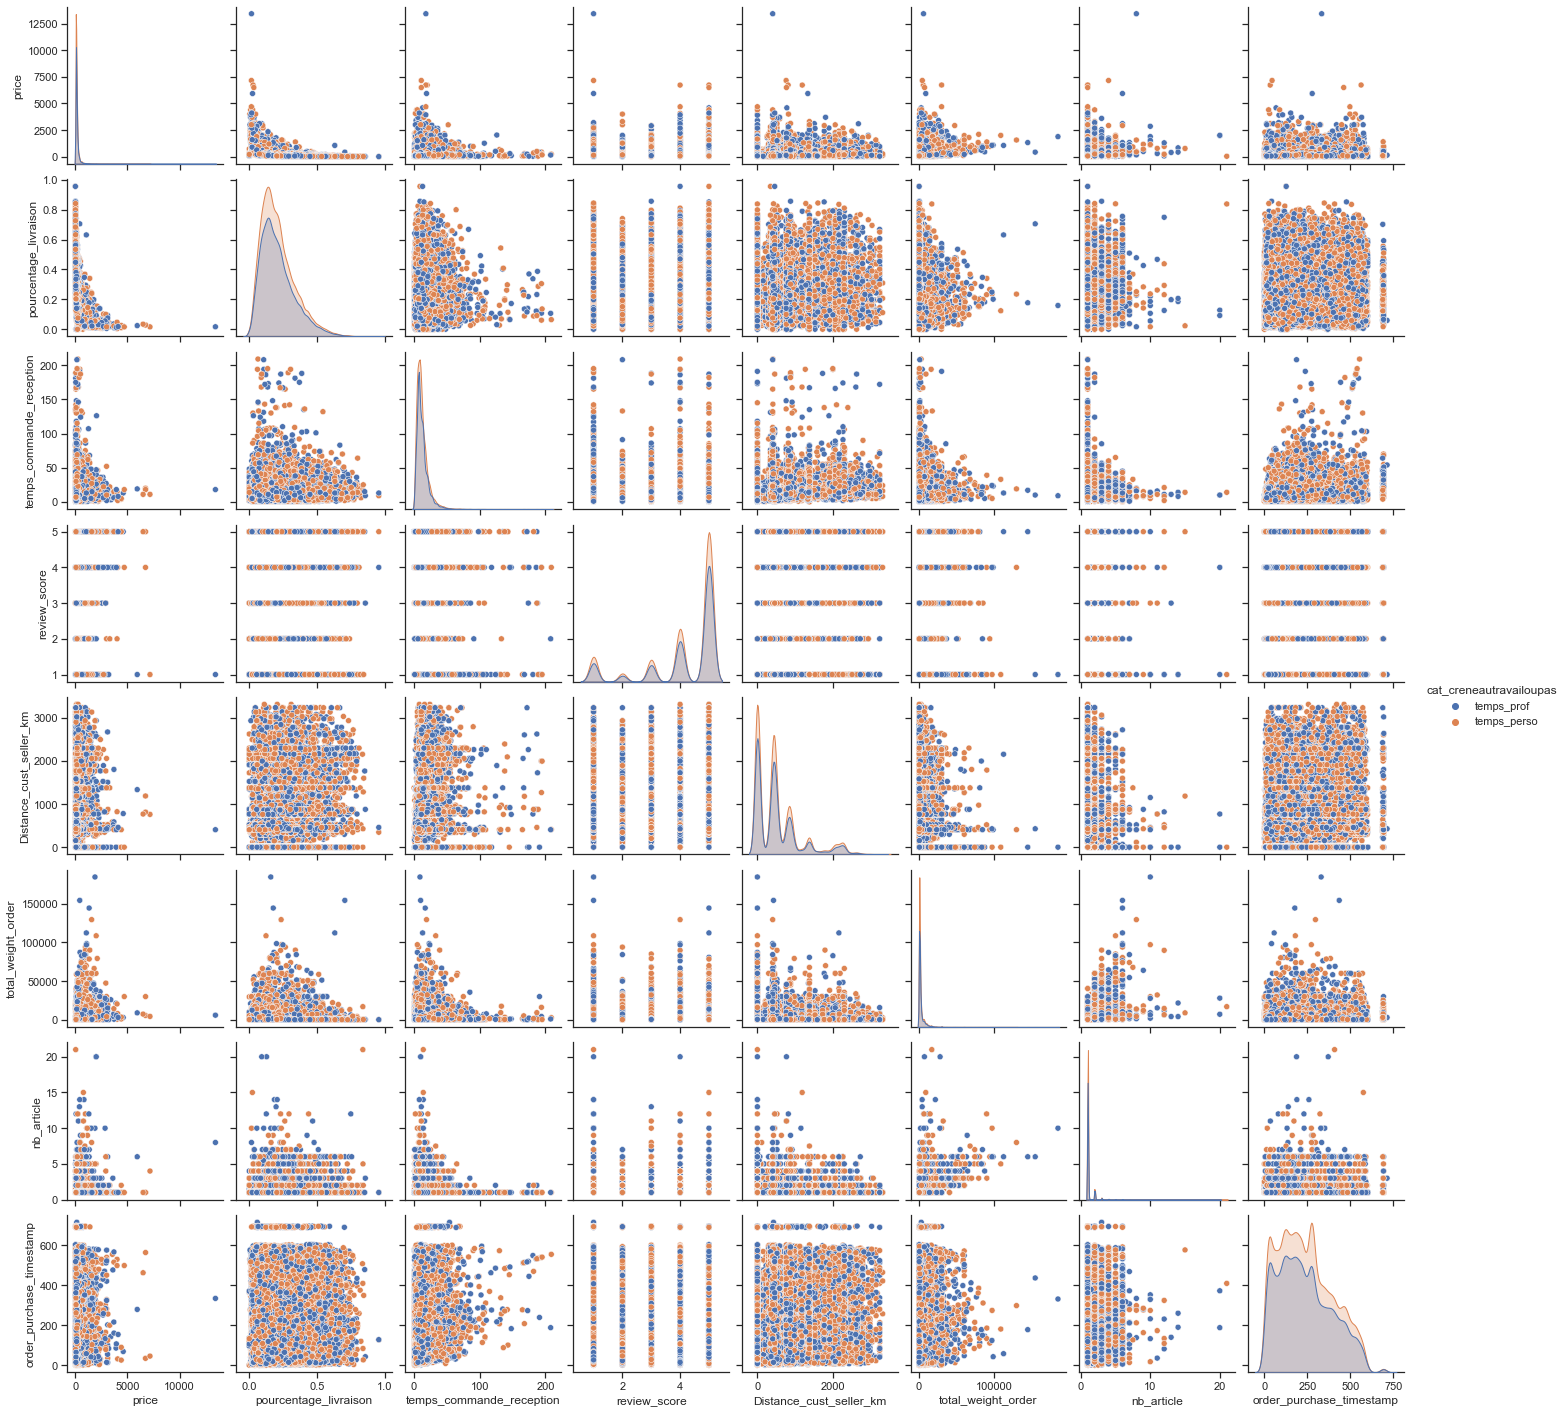

In [97]:
sns.set_theme(style="ticks")

sns.pairplot(df[num_cols.tolist()+['cat_creneautravailoupas']],hue='cat_creneautravailoupas')


In [ ]:
np.log10(df

Jusqu'ici complexe de voir une grosse distinction sur les clusters possibles donc on va à présent essayer un pca et voir comment l'interpréter: 

In [98]:
from sklearn import decomposition
from sklearn import preprocessing 


In [99]:
df_pca=df[num_cols]

In [100]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92057 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     92057 non-null  float64
 1   pourcentage_livraison     92057 non-null  float64
 2   temps_commande_reception  92057 non-null  float64
 3   review_score              92057 non-null  int64  
 4   Distance_cust_seller_km   92057 non-null  float64
 5   total_weight_order        92057 non-null  float64
 6   nb_article                92057 non-null  float64
 7   order_purchase_timestamp  92057 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 8.3+ MB


In [101]:
X=df_pca.values

In [102]:
std_scale=preprocessing.StandardScaler().fit(X)
X_scaled=std_scale.transform(X)

In [103]:
pca=decomposition.PCA()
pca.fit(X_scaled)

PCA()

In [104]:
cumsum=np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.2092395 , 0.41278051, 0.5526702 , 0.67663258, 0.79628022,
       0.8845778 , 0.94919003, 1.        ])

In [105]:
plt.plot(np.arange(1,len(cumsum)+1),cumsum*100,'o:',color='red')
plt.xlim(0,10)
plt.ylim(0,100)
plt.grid()
plt.xlabel('dimension PCA')
plt.ylabel('Variance expliquée %')
plt.title('Variance expliquée en fonction du nombre de dimension')
plt.bar(np.arange(1,len(cumsum)+1),pca.explained_variance_ratio_*100,color='darkred')

<BarContainer object of 8 artists>

In [106]:

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,7))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        

In [107]:
pcs=pca.components_

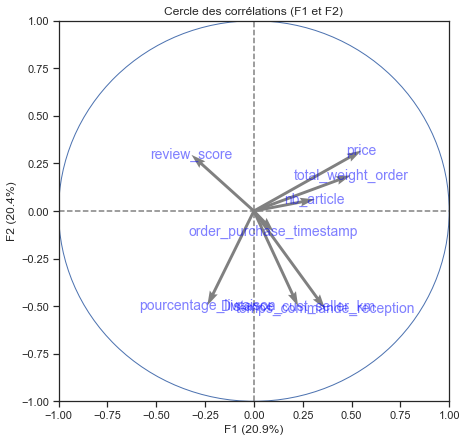

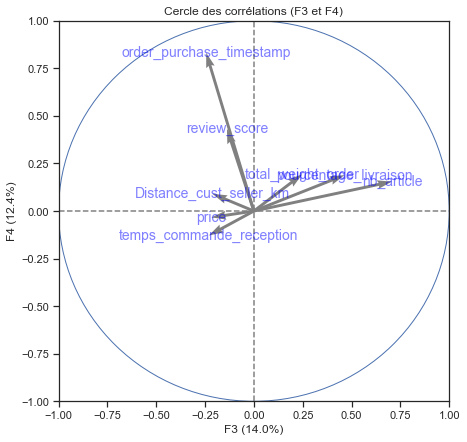

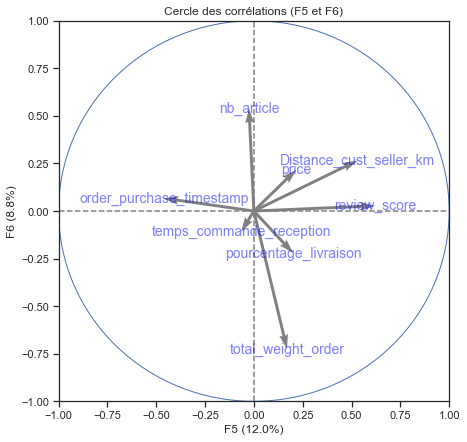

In [109]:
display_circles(pcs,len(cumsum),pca,[(0,1),(2,3),(4,5)], labels = df_pca.columns.tolist())

In [114]:
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)


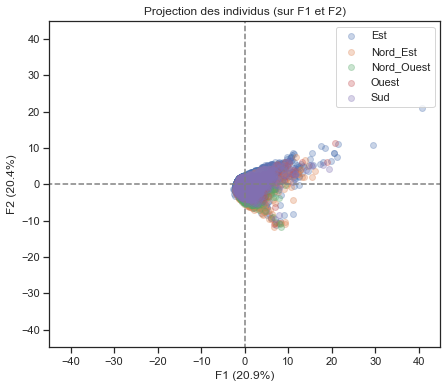

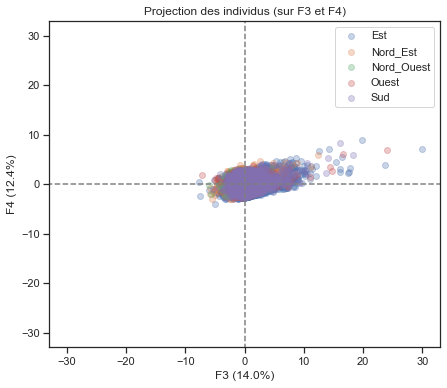

In [116]:
X_proj=pca.transform(X_scaled)
display_factorial_planes(X_proj,len(cumsum),pca, [(0,1),(2,3),(4,5)],alpha=.3,illustrative_var=df.customer_state)


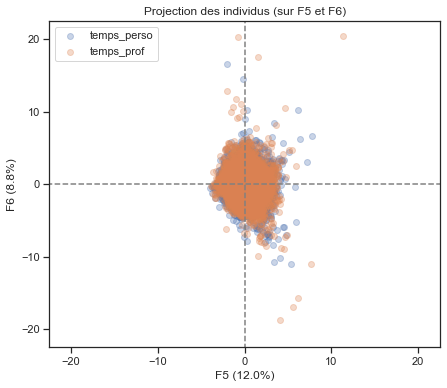

In [117]:
X_proj=pca.transform(X_scaled)
display_factorial_planes(X_proj,len(cumsum),pca, [(0,1),(2,3),(4,5)],alpha=.3,illustrative_var=df.cat_creneautravailoupas)


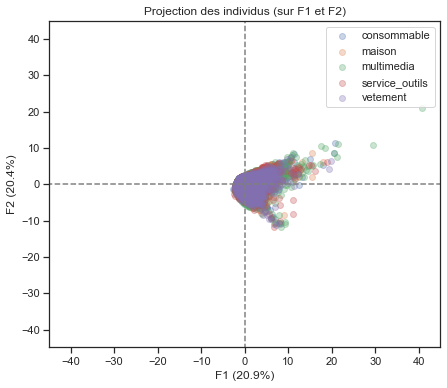

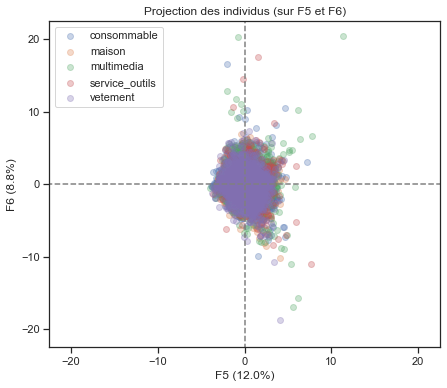

In [118]:
X_proj=pca.transform(X_scaled)
display_factorial_planes(X_proj,len(cumsum),pca, [(0,1),(2,3),(4,5)],alpha=.3,illustrative_var=df.cat_mode_order)


In [119]:
from prince import PCA

In [124]:
pca_princ=PCA(n_components=8)

In [141]:
pd.DataFrame(X_scaled).describe()

0             1             2             3             4  \
count  9.205700e+04  9.205700e+04  9.205700e+04  9.205700e+04  9.205700e+04   
mean   5.950548e-17  4.275081e-17  4.460695e-17 -1.059228e-15  5.511552e-16   
std    1.000005e+00  1.000005e+00  1.000005e+00  1.000005e+00  1.000005e+00   
min   -6.522698e-01 -1.673496e+00 -1.267358e+00 -2.468360e+00 -8.670254e-01   
25%   -4.350270e-01 -7.334861e-01 -6.388759e-01 -1.176581e-01 -8.670254e-01   
50%   -2.415355e-01 -2.022402e-01 -2.198876e-01  6.659093e-01 -1.762977e-01   
75%    5.859815e-02  5.298609e-01  3.038478e-01  6.659093e-01  4.582663e-01   
max    6.344341e+01  5.983845e+00  2.062478e+01  6.659093e-01  4.495295e+00   

                  5             6             7  
count  9.205700e+04  9.205700e+04  9.205700e+04  
mean  -9.319635e-16  2.118827e-15 -1.026803e-17  
std    1.000005e+00  1.000005e+00  1.000005e+00  
min   -5.031403e-01 -2.650933e-01 -1.548540e+00  
25%   -4.401299e-01 -2.650933e-01 -8.077754e-01  
50%   -3.456143e-01 -2.650933e-01 -1.260096e-01  
75%   -6.206756e-02 -2.650933e-01  7.130867e-01  
max    3.822724e+01  3.757408e+01  3.125489e+00

In [125]:
pca_princ.fit(X_scaled)
mpg_pca = pca_princ.transform(X_scaled)

In [127]:
np.cumsum(pca_princ.explained_inertia_)

array([0.2092395 , 0.41278051, 0.5526702 , 0.67663258, 0.79628022,
       0.8845778 , 0.94919003, 1.        ])

In [139]:
ax = pca_princ.plot_row_coordinates(X_scaled,color_labels=df.cat_creneautravailoupas)

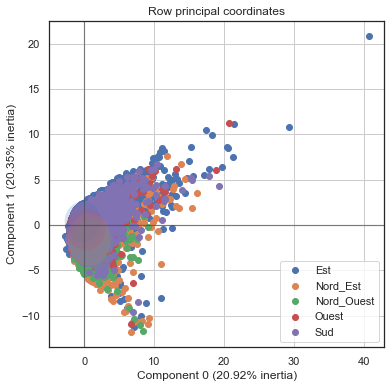

In [140]:
ax = pca_princ.plot_row_coordinates(X_scaled,color_labels=df.customer_state)

In [132]:
flights = sns.load_dataset('flights')
pivot = flights.pivot_table(values = 'passengers', index ='year' ,columns =  'month' )
pivot

month  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
year                                                             
1949   112  118  132  129  121  135  148  148  136  119  104  118
1950   115  126  141  135  125  149  170  170  158  133  114  140
1951   145  150  178  163  172  178  199  199  184  162  146  166
1952   171  180  193  181  183  218  230  242  209  191  172  194
1953   196  196  236  235  229  243  264  272  237  211  180  201
1954   204  188  235  227  234  264  302  293  259  229  203  229
1955   242  233  267  269  270  315  364  347  312  274  237  278
1956   284  277  317  313  318  374  413  405  355  306  271  306
1957   315  301  356  348  355  422  465  467  404  347  305  336
1958   340  318  362  348  363  435  491  505  404  359  310  337
1959   360  342  406  396  420  472  548  559  463  407  362  405
1960   417  391  419  461  472  535  622  606  508  461  390  432